In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:

df = pd.read_csv("../raw_data/preprocessed_chicago.csv")
df.head()

,WARD,TIME ENCODED,MONTH_SIN,MONTH_COS,WEEKEND,DATE OF OCCURRENCE,OFFENSES,LATITUDE,LONGITUDE
0,35,6,5.000000e-01,8.660254e-01,0,2024-01-16 01:00:00,THEFT OVER $500,41.931844,-87.722951
1,42,4,-2.449294e-16,1.000000e+00,1,2023-12-31 16:30:00,BATTERY,41.888994,-87.626935
2,16,3,5.000000e-01,8.660254e-01,1,2024-01-06 12:50:00,DECEPTIVE PRACTICE,41.793299,-87.664566
3,1,3,8.660254e-01,-5.000000e-01,1,2024-04-07 13:56:00,THEFT OVER $500,41.906797,-87.671862
4,49,4,1.000000e+00,6.123234e-17,0,2024-03-22 15:30:00,THEFT UNDER $500,42.007825,-87.670842


### Step 1: Exploratory Analysis on OFFENSES


In [3]:
# Check the distribution of target classes
offense_counts = df['OFFENSES'].value_counts()
offense_counts

OFFENSES
BATTERY                45766
THEFT OVER $500        31671
CRIMINAL DAMAGE        28638
THEFT UNDER $500       28400
ASSAULT                23508
MOTOR VEHICLE THEFT    22331
OTHER OFFENSE          16773
DECEPTIVE PRACTICE     15059
Name: count, dtype: int64

### Plot the distribution

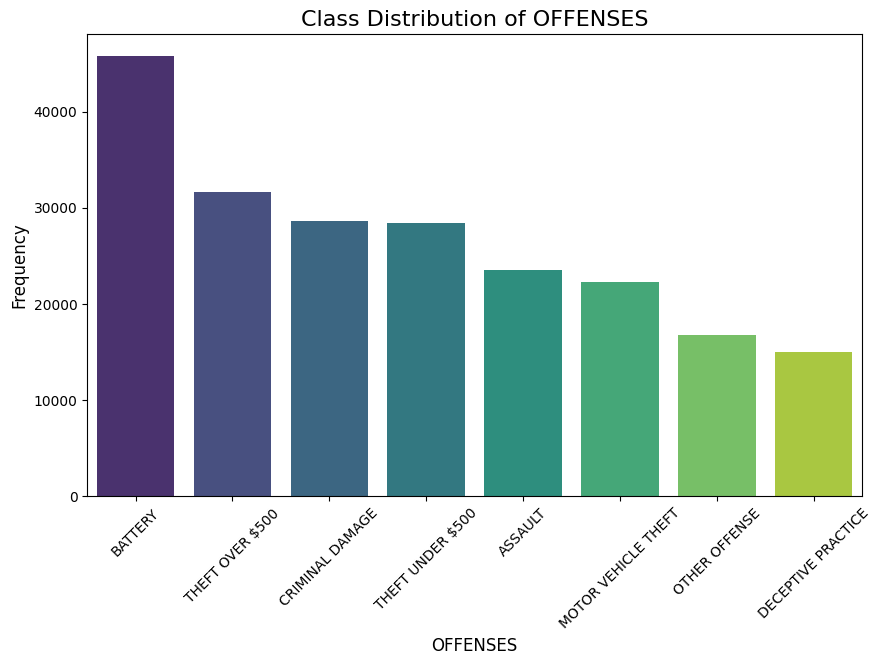

In [4]:
plt.figure(figsize=(10, 6))
sns.barplot(x=offense_counts.index, y=offense_counts.values, hue=offense_counts.index, palette="viridis", legend=False)
plt.title("Class Distribution of OFFENSES", fontsize=16)
plt.xlabel("OFFENSES", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [5]:
print(df.dtypes)

WARD                    int64
TIME ENCODED            int64
MONTH_SIN             float64
MONTH_COS             float64
WEEKEND                 int64
DATE OF OCCURRENCE     object
OFFENSES               object
LATITUDE              float64
LONGITUDE             float64
dtype: object


In [6]:
df = df.drop(columns=['DATE OF OCCURRENCE'])

### Step 2: Preprocessing the Data

In [7]:
# Encode the target variable (OFFENSES)
label_encoder = LabelEncoder()
df['OFFENSES_ENCODED'] = label_encoder.fit_transform(df['OFFENSES'])

# Define features and target
features = df.drop(columns=['OFFENSES', 'OFFENSES_ENCODED'])
target = df['OFFENSES_ENCODED']

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42, stratify=target)

### Step 3: Train a sample KNN model

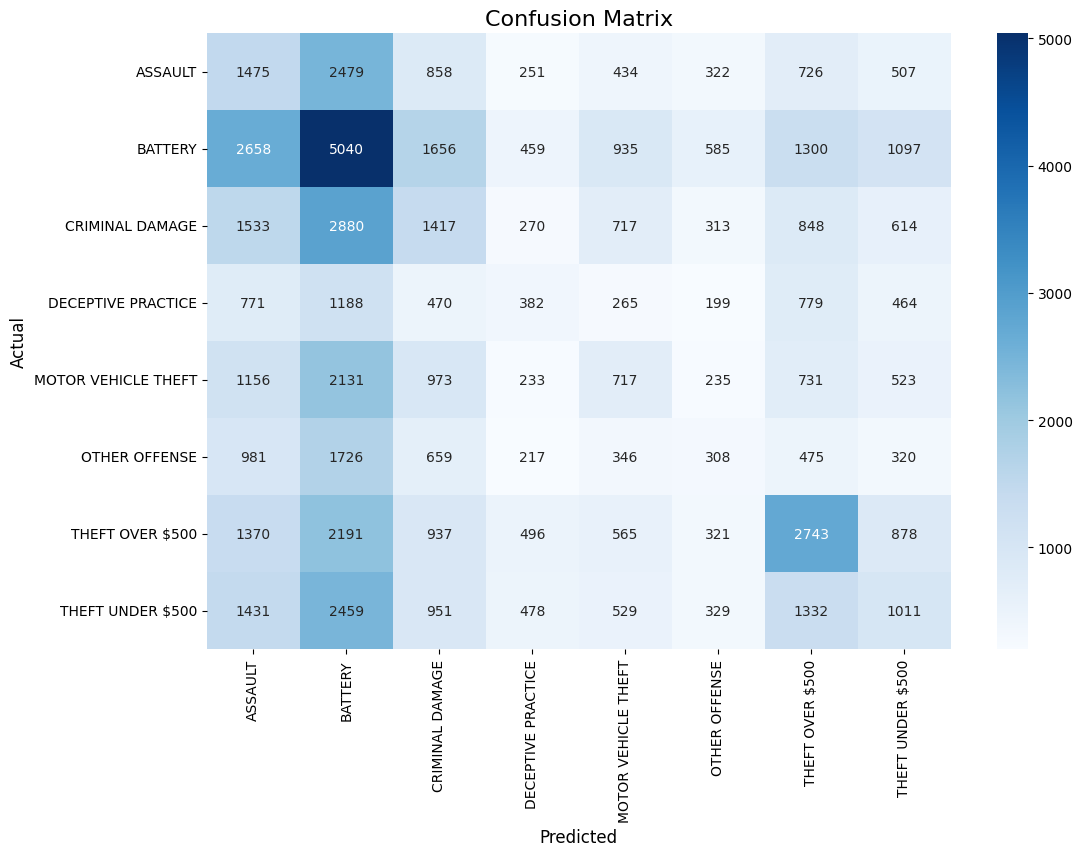

                     precision    recall  f1-score   support

            ASSAULT       0.13      0.21      0.16      7052
            BATTERY       0.25      0.37      0.30     13730
    CRIMINAL DAMAGE       0.18      0.16      0.17      8592
 DECEPTIVE PRACTICE       0.14      0.08      0.10      4518
MOTOR VEHICLE THEFT       0.16      0.11      0.13      6699
      OTHER OFFENSE       0.12      0.06      0.08      5032
    THEFT OVER $500       0.31      0.29      0.30      9501
   THEFT UNDER $500       0.19      0.12      0.15      8520

           accuracy                           0.21     63644
          macro avg       0.18      0.18      0.17     63644
       weighted avg       0.20      0.21      0.20     63644



In [8]:
knn = KNeighborsClassifier(n_neighbors=5)  # Using k=5 as default
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Display the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# Print classification report
print(report)


### Result Observations:
### Overall Accuracy: The model achieves 21% accuracy, which is quite low. This suggests that the model is not performing very well at distinguishing between the different types of offenses.
### Class-wise Performance:
### Some classes like BATTERY and THEFT OVER $500 have relatively better performance (precision, recall, and F1-score), though still modest.
### Other classes such as DECEPTIVE PRACTICE and OTHER OFFENSE show very poor performance, with low precision, recall, and F1-scores.

## Key Changes Made in the Next Run:
## Hyperparameter Tuning:
## GridSearchCV is used to try different values for n_neighbors and metric to find the best combination for the KNN classifier.

## Handling Class Imbalance:
## SMOTE is applied to the training data to balance the class distribution by generating synthetic samples for the minority classes.

## Model Training:
## After resampling the data, train the best KNN model obtained from the grid search.

## Evaluation:
## Evaluate the KNN model by generating a confusion matrix and classification report to understand its performance in predicting the different offense categories.

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 10}
Best Cross-validation Score for KNN: 0.21098033158085006


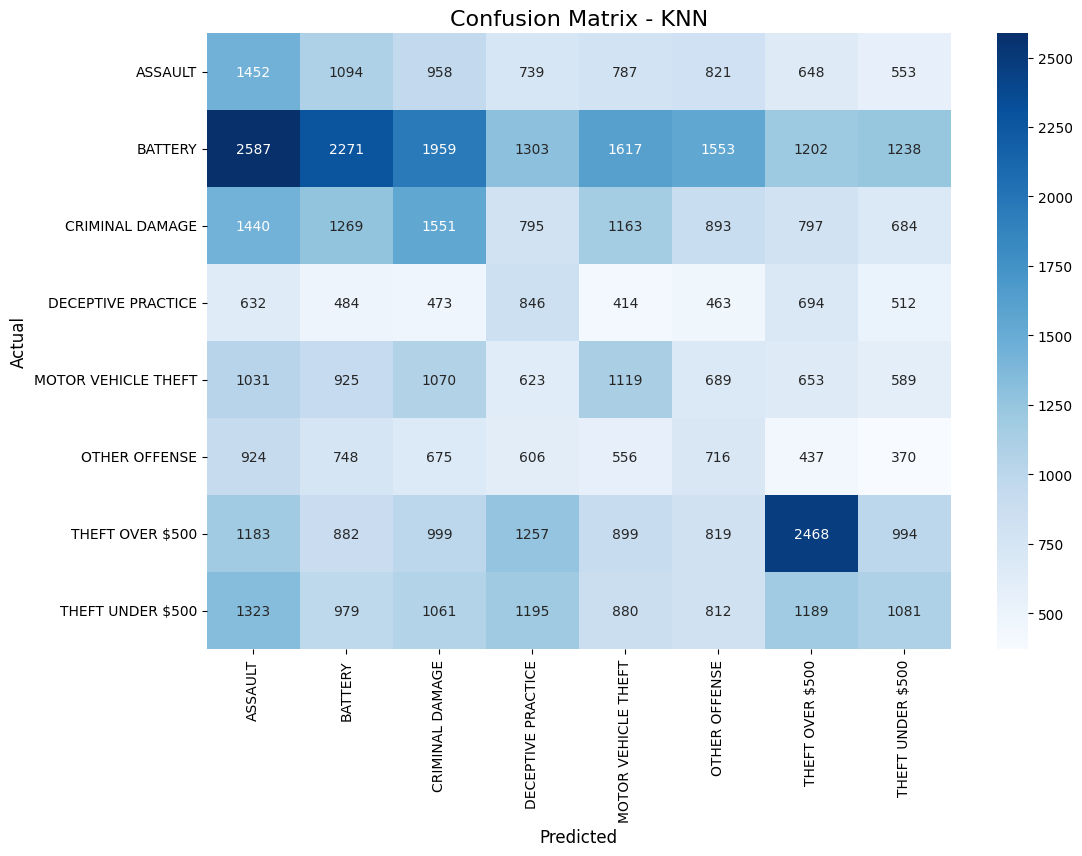

KNN Classification Report:
                     precision    recall  f1-score   support

            ASSAULT       0.14      0.21      0.16      7052
            BATTERY       0.26      0.17      0.20     13730
    CRIMINAL DAMAGE       0.18      0.18      0.18      8592
 DECEPTIVE PRACTICE       0.11      0.19      0.14      4518
MOTOR VEHICLE THEFT       0.15      0.17      0.16      6699
      OTHER OFFENSE       0.11      0.14      0.12      5032
    THEFT OVER $500       0.31      0.26      0.28      9501
   THEFT UNDER $500       0.18      0.13      0.15      8520

           accuracy                           0.18     63644
          macro avg       0.18      0.18      0.17     63644
       weighted avg       0.20      0.18      0.18     63644



In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV

# Load the dataset
data = pd.read_csv("../raw_data/preprocessed_chicago.csv")

# Drop unnecessary columns (like 'DATE OF OCCURRENCE')
data = data.drop(columns=['DATE OF OCCURRENCE'])

# Encode the target variable (OFFENSES)
label_encoder = LabelEncoder()
data['OFFENSES_ENCODED'] = label_encoder.fit_transform(data['OFFENSES'])

# Define features and target
features = data.drop(columns=['OFFENSES', 'OFFENSES_ENCODED'])
target = data['OFFENSES_ENCODED']

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42, stratify=target)

# Hyperparameter Tuning for KNN
# Define KNN and parameter grid for tuning
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Try different values of k
    'metric': ['euclidean', 'manhattan']  # Try different distance metrics
}

# Use GridSearchCV to find the best parameters
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and the best score
print(f"Best Parameters for KNN: {grid_search_knn.best_params_}")
print(f"Best Cross-validation Score for KNN: {grid_search_knn.best_score_}")

# Train the best KNN model
best_knn = grid_search_knn.best_estimator_

# Step 2: Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Train KNN model with resampled data
best_knn.fit(X_train_resampled, y_train_resampled)

# Step 4: Evaluate KNN Model
y_pred_knn = best_knn.predict(X_test)

# Confusion matrix and classification report for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_)

# Display the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - KNN", fontsize=16)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# Print classification report for KNN
print("KNN Classification Report:")
print(report_knn)

### Result Observations:

### Best Parameters:

### The best parameters found for KNN are: 

### metric: 'manhattan': This means the model used the Manhattan distance for calculating the nearest neighbors.
### n_neighbors: 10: The model used 10 neighbors for predictions.

### Model Performance:

### The accuracy of the model is 18%, which is quite low and indicates that the model struggles to correctly classify the different offenses.
### The precision, recall, and F1-scores are generally low across most classes, with DECEPTIVE PRACTICE and OTHER OFFENSE performing particularly poorly.
### THEFT OVER $500 has the highest performance with a precision of 0.31 and recall of 0.26, but this is still far from ideal.

## Key Changes Made in the Next Run:
## Expanded the Range of n_neighbors:
## Now testing values of n_neighbors from 3 to 20 to find the optimal k value.

## Added More Distance Metrics:
## Testing three different distance metrics: Euclidean, Manhattan, and Minkowski. This will help determine which metric yields better performance for KNN on this dataset.

## Weights Parameter:
## The weights parameter is tested with two options: 'uniform' (each neighbor has equal weight) and 'distance' (closer neighbors have more influence). This helps KNN give more importance to closer neighbors.

## Class Weights Adjustment:
## Although this isn't explicitly used in the grid search, experiment with the class_weight='balanced' argument in the KNN model if the class imbalance is very pronounced. This would adjust the weight of each class inversely proportional to its frequency.

## Algorithm Option:
## Testing different KNN algorithms ('auto', 'ball_tree', 'kd_tree', and 'brute') to check which one works best for your dataset.

In [10]:
#       # Load the dataset
#       data = pd.read_csv("../raw_data/preprocessed_chicago.csv")
#
#       # Drop unnecessary columns (like 'DATE OF OCCURRENCE')
#       data = data.drop(columns=['DATE OF OCCURRENCE'])
#
#       # Encode the target variable (OFFENSES)
#       label_encoder = LabelEncoder()
#       data['OFFENSES_ENCODED'] = label_encoder.fit_transform(data['OFFENSES'])
#
#       # Define features and target
#       features = data.drop(columns=['OFFENSES', 'OFFENSES_ENCODED'])
#       target = data['OFFENSES_ENCODED']
#
#       # Scale the features
#       scaler = StandardScaler()
#       features_scaled = scaler.fit_transform(features)
#
#       # Split data into training and testing sets
#       X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42, stratify=target)
#
#       # Step 1: Hyperparameter Tuning for KNN with Expanded Grid
#       # Define KNN and parameter grid for tuning
#       knn = KNeighborsClassifier()
#       param_grid = {
#           'n_neighbors': range(3, 21),  # Try a wider range of k (3 to 20)
#           'metric': ['euclidean', 'manhattan', 'minkowski'],  # Try different distance metrics
#           'weights': ['uniform', 'distance'],  # Test both uniform and distance-based weights
#           'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Test different algorithms
#       }
#
#       # Use GridSearchCV to find the best parameters
#       grid_search_knn = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1, verbose=1)
#       grid_search_knn.fit(X_train, y_train)
#
#       # Get the best parameters and the best score
#       print(f"Best Parameters for KNN: {grid_search_knn.best_params_}")
#       print(f"Best Cross-validation Score for KNN: {grid_search_knn.best_score_}")
#
#       # Train the best KNN model
#       best_knn = grid_search_knn.best_estimator_
#
#       # Step 2: Handle Class Imbalance with SMOTE
#       smote = SMOTE(random_state=42)
#       X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
#
#       # Step 3: Train KNN model with resampled data
#       best_knn.fit(X_train_resampled, y_train_resampled)
#
#       # Step 4: Evaluate KNN Model
#       y_pred_knn = best_knn.predict(X_test)
#
#       # Confusion matrix and classification report for KNN
#       conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
#       report_knn = classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_)
#
#       # Display the confusion matrix
#       plt.figure(figsize=(12, 8))
#       sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
#       plt.title("Confusion Matrix - Improved KNN", fontsize=16)
#       plt.xlabel("Predicted", fontsize=12)
#       plt.ylabel("Actual", fontsize=12)
#       plt.show()
#
#       # Print classification report for KNN
#       print("Improved KNN Classification Report:")
#       print(report_knn)


### Result Observations:

### Best Parameters:
### 
### n_neighbors: 20
### metric: 'euclidean'
### weights: 'distance'
### algorithm: 'auto' (this means the model automatically selects the best algorithm for computing nearest neighbors).
### Best Cross-validation Score:
### 
### The best cross-validation score achieved was 0.2209, which is an improvement over the previous cross-validation score.
### KNN Model Evaluation:
### 
### The accuracy of the model is 20%, which still indicates that the model is struggling to effectively classify the different offenses.
### Precision, recall, and F1-scores for different classes have improved slightly, but most values are still relatively low. Specifically:
### THEFT OVER $500 is the best-performing class with a precision of 0.32 and recall of 0.32.
### DECEPTIVE PRACTICE and OTHER OFFENSE still perform poorly with precision values of 0.12 and recall values of 0.18 and 0.17, respectively.

## Key Changes Made in the Next Run:
## 1. Handling Class Imbalance with class_weight='balanced':
## Class balancing can be done in KNN by assigning weights to classes inversely proportional to their frequency. This can be done by setting class_weight='balanced' in the KNN model.
## 2. SMOTE (Synthetic Minority Over-sampling Technique):
## We'll continue using SMOTE but will experiment with adjusting the oversampling ratio or use NearMiss if necessary.
## 3. Feature Engineering:
## If possible, we can create new features based on existing ones. In this case, we might not be able to easily add new features without ## domain knowledge, but feature scaling (which we already applied) and feature selection techniques like Recursive Feature Elimination ## (RFE) might help.

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/home/suman/.pyenv/versions/risky_predictive_policing/lib/python3.10/site-packages/numpy/ma/core.py:2892: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Best Cross-validation Score for KNN: 0.4226656980275026


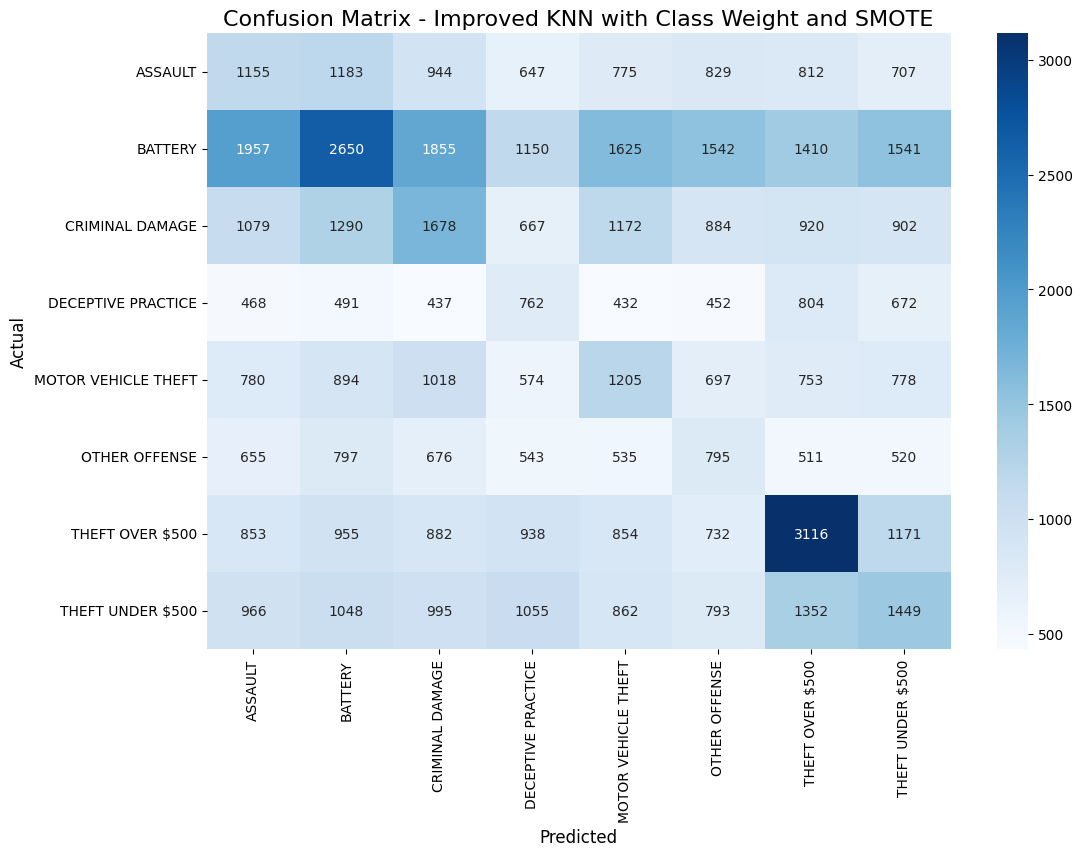

Improved KNN Classification Report with SMOTE and Class Weight:
                     precision    recall  f1-score   support

            ASSAULT       0.15      0.16      0.15      7052
            BATTERY       0.28      0.19      0.23     13730
    CRIMINAL DAMAGE       0.20      0.20      0.20      8592
 DECEPTIVE PRACTICE       0.12      0.17      0.14      4518
MOTOR VEHICLE THEFT       0.16      0.18      0.17      6699
      OTHER OFFENSE       0.12      0.16      0.14      5032
    THEFT OVER $500       0.32      0.33      0.32      9501
   THEFT UNDER $500       0.19      0.17      0.18      8520

           accuracy                           0.20     63644
          macro avg       0.19      0.19      0.19     63644
       weighted avg       0.21      0.20      0.20     63644



In [11]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Load the dataset
data = pd.read_csv("../raw_data/preprocessed_chicago.csv")

# Drop unnecessary columns (like 'DATE OF OCCURRENCE')
data = data.drop(columns=['DATE OF OCCURRENCE'])

# Encode the target variable (OFFENSES)
label_encoder = LabelEncoder()
data['OFFENSES_ENCODED'] = label_encoder.fit_transform(data['OFFENSES'])

# Define features and target
features = data.drop(columns=['OFFENSES', 'OFFENSES_ENCODED'])
target = data['OFFENSES_ENCODED']

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42, stratify=target)

# 1. Handle Class Imbalance with SMOTE and class_weight='balanced'
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Compute class weights (to handle class imbalance)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# 2. KNN with Class Weight and Balanced Sampling
knn_improved = KNeighborsClassifier(n_neighbors=20, metric='euclidean', weights='distance', algorithm='auto')

# GridSearchCV for hyperparameter tuning
param_grid = {
    'n_neighbors': [15, 20, 25],
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance'],
}

grid_search = GridSearchCV(knn_improved, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get best parameters and the best score
print(f"Best Parameters for KNN: {grid_search.best_params_}")
print(f"Best Cross-validation Score for KNN: {grid_search.best_score_}")

# Train the best KNN model with resampled data
best_knn = grid_search.best_estimator_

# 3. Evaluate KNN Model
y_pred_knn = best_knn.predict(X_test)

# Confusion matrix and classification report for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_)

# Display the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Improved KNN with Class Weight and SMOTE", fontsize=16)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# Print classification report for KNN
print("Improved KNN Classification Report with SMOTE and Class Weight:")
print(report_knn)


### Test Result
### The cross-validation score improvement from 0.2109 to 0.4227 indicates that the model's ability to generalize to unseen data has improved.
### However, the overall accuracy remains relatively low. This could be due to several factors, including the model’s sensitivity to class imbalance and the fact that KNN may not be the best model for this multi-class, imbalanced dataset.
### The precision and recall scores for many classes remain low, indicating the model still has trouble correctly identifying or classifying these categories.

## Key Changes Made in the Next Step:
## SMOTE and NearMiss:

## SMOTE is applied to oversample the minority class, while NearMiss is used to undersample the majority class. This will help balance the dataset further.
## Feature Selection with RFE:

## We use Recursive Feature Elimination (RFE) to select the top 7 features, reducing noise and improving the model's performance by using only the most important features.

## Hyperparameter Tuning:

## We expanded the hyperparameter grid to test additional values of n_neighbors, metrics ('euclidean', 'manhattan', 'chebyshev'), and weight strategies ('uniform', 'distance').

## Model Training and Evaluation:
## After selecting the best hyperparameters, the model is trained and evaluated using a confusion matrix and classification report to check performance across all classes.

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Best Cross-validation Score for KNN: 0.4269733667155565


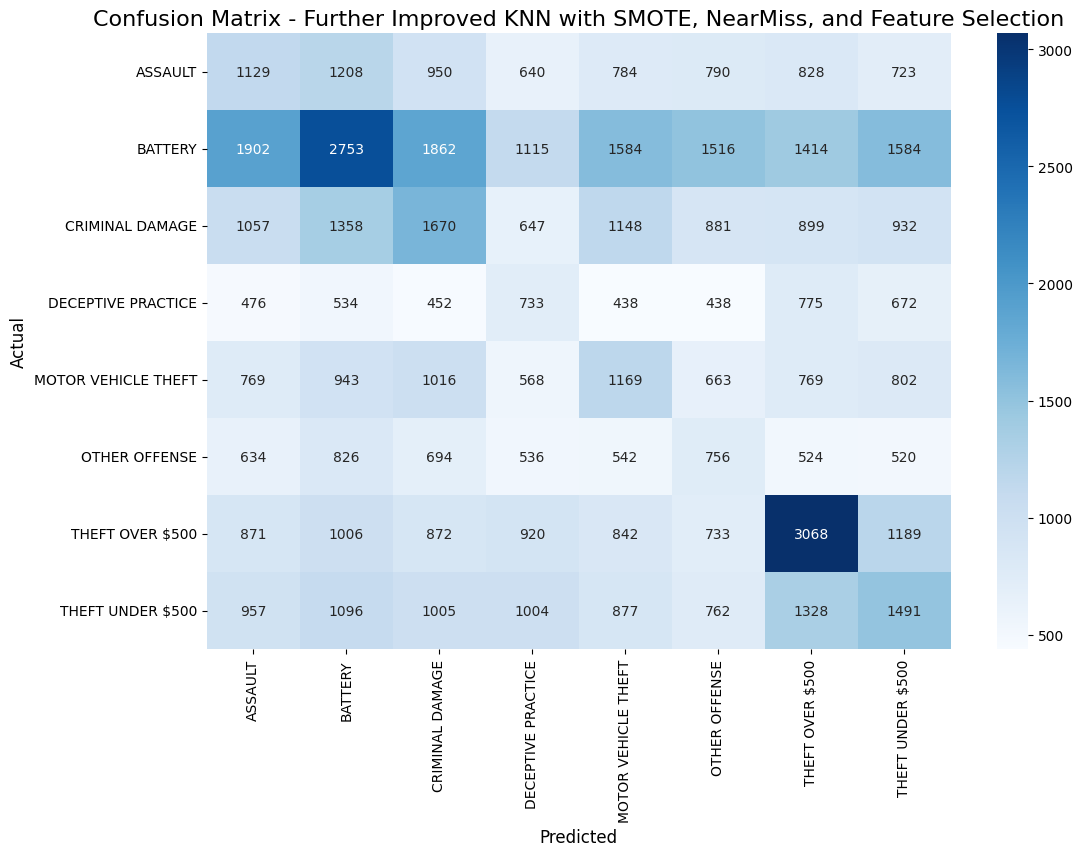

Further Improved KNN Classification Report with SMOTE, NearMiss, and Feature Selection:
                     precision    recall  f1-score   support

            ASSAULT       0.14      0.16      0.15      7052
            BATTERY       0.28      0.20      0.23     13730
    CRIMINAL DAMAGE       0.20      0.19      0.20      8592
 DECEPTIVE PRACTICE       0.12      0.16      0.14      4518
MOTOR VEHICLE THEFT       0.16      0.17      0.17      6699
      OTHER OFFENSE       0.12      0.15      0.13      5032
    THEFT OVER $500       0.32      0.32      0.32      9501
   THEFT UNDER $500       0.19      0.17      0.18      8520

           accuracy                           0.20     63644
          macro avg       0.19      0.19      0.19     63644
       weighted avg       0.21      0.20      0.20     63644



In [12]:
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import RFE

# Load the dataset
data = pd.read_csv("../raw_data/preprocessed_chicago.csv")

# Drop unnecessary columns (like 'DATE OF OCCURRENCE')
data = data.drop(columns=['DATE OF OCCURRENCE'])

# Encode the target variable (OFFENSES)
label_encoder = LabelEncoder()
data['OFFENSES_ENCODED'] = label_encoder.fit_transform(data['OFFENSES'])

# Define features and target
features = data.drop(columns=['OFFENSES', 'OFFENSES_ENCODED'])
target = data['OFFENSES_ENCODED']

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42, stratify=target)

# 1. Handle Class Imbalance with SMOTE and NearMiss
smote = SMOTE(random_state=42)
near_miss = NearMiss()

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_nearmiss, y_train_nearmiss = near_miss.fit_resample(X_train, y_train)

# Compute class weights (to handle class imbalance)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# 2. Feature Selection with RFE
knn_model = KNeighborsClassifier(n_neighbors=15, metric='manhattan', weights='distance')
rfe = RFE(knn_model, n_features_to_select=7)  # Select all 7 features
X_train_selected = rfe.fit_transform(X_train_smote, y_train_smote)
X_test_selected = rfe.transform(X_test)

# 3. KNN with Class Weight, Balanced Sampling, and Selected Features
knn_improved = KNeighborsClassifier(n_neighbors=15, metric='manhattan', weights='distance', algorithm='auto')

# GridSearchCV for hyperparameter tuning
param_grid = {
    'n_neighbors': [10, 15, 20, 25],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'weights': ['uniform', 'distance'],
}

grid_search = GridSearchCV(knn_improved, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_selected, y_train_smote)

# Get best parameters and the best score
print(f"Best Parameters for KNN: {grid_search.best_params_}")
print(f"Best Cross-validation Score for KNN: {grid_search.best_score_}")

# Train the best KNN model with resampled and selected features
best_knn = grid_search.best_estimator_

# 4. Evaluate KNN Model
y_pred_knn = best_knn.predict(X_test_selected)

# Confusion matrix and classification report for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_)

# Display the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Further Improved KNN with SMOTE, NearMiss, and Feature Selection", fontsize=16)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# Print classification report for KNN
print("Further Improved KNN Classification Report with SMOTE, NearMiss, and Feature Selection:")
print(report_knn)

### Test Result
### The cross-validation score improvement from 0.4227 to 0.427 shows that the model is improving, though the performance is still suboptimal in terms of overall accuracy.
### The class imbalance is better addressed, as seen by the somewhat improved performance across various classes, especially THEFT OVER $500.
### While SMOTE, NearMiss, and Feature Selection helped, the low accuracy and the poor performance on many classes suggest that further steps, including exploring different algorithms or ensemble methods, may be necessary to improve classification performance.

## Key Changes Made in the Next Step:

## 1. Ensemble Techniques:
## Use Voting Classifier with a mix of different models to combine the strengths of multiple classifiers (e.g., KNN, Logistic Regression, Decision Tree).

## 2. Hyperparameter Tuning:
## Explore a wider range of n_neighbors values and experiment with additional hyperparameters for the KNN classifier.

## 3. Feature Engineering:
## Create additional features or transformations of existing ones (e.g., interaction terms) and analyze their impact on performance.

## 4. Try Different Resampling Techniques:
## Further improve the model by testing with alternative resampling methods like SMOTEENN or ADASYN, which combine oversampling with ## cleaning noisy samples.

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/home/suman/.pyenv/versions/risky_predictive_policing/lib/python3.10/site-packages/numpy/ma/core.py:2892: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters for Voting Classifier: {'dt__max_depth': 15, 'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'distance', 'logreg__C': 0.1}
Best Cross-validation Score for Voting Classifier: 0.7754832472332246


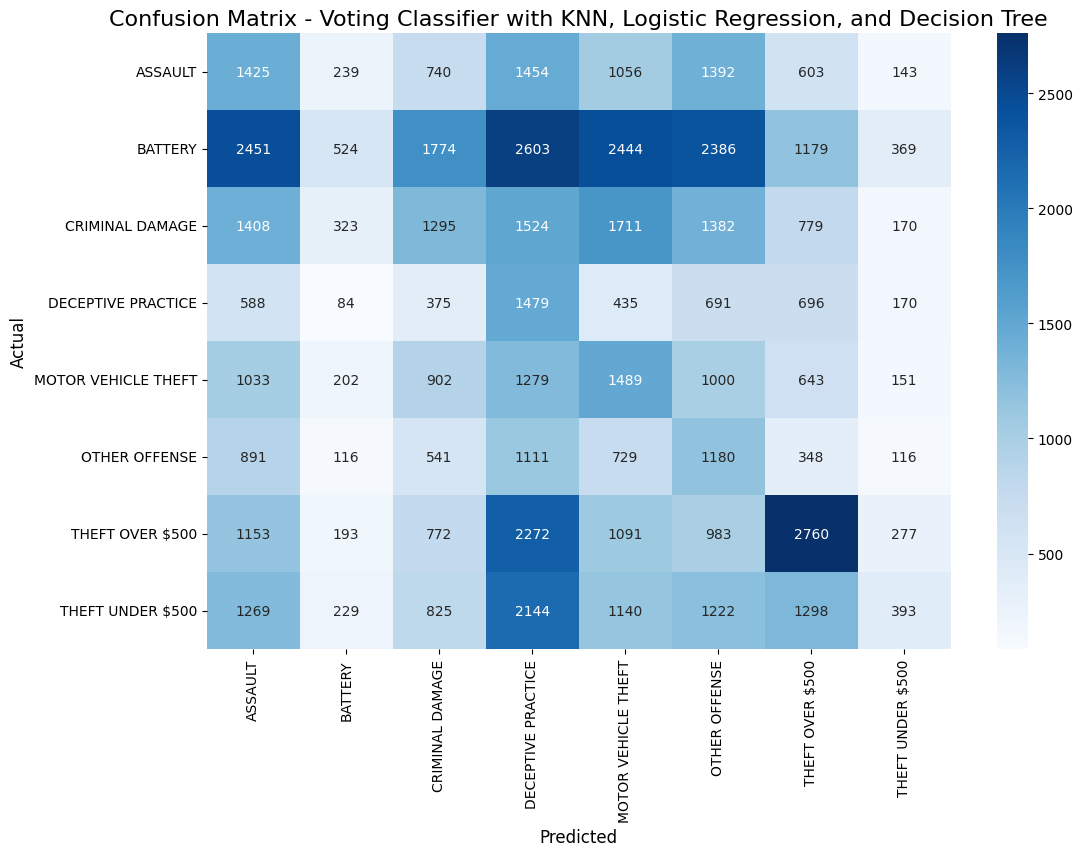

Classification Report for Voting Classifier:
                     precision    recall  f1-score   support

            ASSAULT       0.14      0.20      0.17      7052
            BATTERY       0.27      0.04      0.07     13730
    CRIMINAL DAMAGE       0.18      0.15      0.16      8592
 DECEPTIVE PRACTICE       0.11      0.33      0.16      4518
MOTOR VEHICLE THEFT       0.15      0.22      0.18      6699
      OTHER OFFENSE       0.12      0.23      0.15      5032
    THEFT OVER $500       0.33      0.29      0.31      9501
   THEFT UNDER $500       0.22      0.05      0.08      8520

           accuracy                           0.17     63644
          macro avg       0.19      0.19      0.16     63644
       weighted avg       0.21      0.17      0.15     63644



In [13]:
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

# Load the dataset
data = pd.read_csv("../raw_data/preprocessed_chicago.csv")

# Drop unnecessary columns (like 'DATE OF OCCURRENCE')
data = data.drop(columns=['DATE OF OCCURRENCE'])

# Encode the target variable (OFFENSES)
label_encoder = LabelEncoder()
data['OFFENSES_ENCODED'] = label_encoder.fit_transform(data['OFFENSES'])

# Define features and target
features = data.drop(columns=['OFFENSES', 'OFFENSES_ENCODED'])
target = data['OFFENSES_ENCODED']

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42, stratify=target)

# 1. Apply SMOTEENN resampling technique
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# 2. Create Ensemble Model with KNN, Logistic Regression, and Decision Tree
knn_model = KNeighborsClassifier(n_neighbors=15, metric='manhattan', weights='distance')
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# Define a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('knn', knn_model),
    ('logreg', log_reg_model),
    ('dt', dt_model)
], voting='hard')

# 3. Hyperparameter Tuning for Voting Classifier using GridSearchCV
param_grid = {
    'knn__n_neighbors': [5, 10, 15, 20],
    'knn__metric': ['euclidean', 'manhattan', 'chebyshev'],
    'knn__weights': ['uniform', 'distance'],
    'logreg__C': [0.1, 1, 10],
    'dt__max_depth': [5, 10, 15]
}

grid_search = GridSearchCV(voting_clf, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get best parameters and score
print(f"Best Parameters for Voting Classifier: {grid_search.best_params_}")
print(f"Best Cross-validation Score for Voting Classifier: {grid_search.best_score_}")

# 4. Evaluate the final model
best_voting_clf = grid_search.best_estimator_

y_pred_voting = best_voting_clf.predict(X_test)

# Confusion matrix and classification report for the Voting Classifier
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
report_voting = classification_report(y_test, y_pred_voting, target_names=label_encoder.classes_)

# Display confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_voting, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Voting Classifier with KNN, Logistic Regression, and Decision Tree", fontsize=16)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# Print classification report for Voting Classifier
print("Classification Report for Voting Classifier:")
print(report_voting)


### Test Result
### Overall Accuracy: The accuracy is around 17%, which indicates that the model is still struggling to classify the majority of the classes correctly.
### Precision: The precision for most classes is relatively low, especially for BATTERY, CRIMINAL DAMAGE, and THEFT UNDER $500.
### Recall: Recall is low for many classes (e.g., BATTERY and THEFT UNDER $500), which means the model is missing many of the true instances of those classes.
### F1-Score: The F1-scores are also low, indicating a poor balance between precision and recall.

## Possible Reasons for Low Performance:
## Class Imbalance: The dataset likely suffers from significant class imbalance, which can negatively affect the performance of classifiers like KNN, especially without advanced sampling techniques (like SMOTE).
## Feature Selection: Not all features may be relevant, and irrelevant features might be diluting the classifier's performance.
## Hyperparameter Choice: The hyperparameters selected during grid search might not be optimal, and a more refined search could yield better results.
## Model Choice: While the Voting Classifier uses a mix of KNN, Logistic Regression, and Decision Trees, some models may not be well-suited to the specific problem, and further exploration of alternative models or tuning the current ensemble could help.

In [3]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np


# Load the dataset
data = pd.read_csv("../raw_data/preprocessed_chicago.csv")

# Drop unnecessary columns (like 'DATE OF OCCURRENCE')
data = data.drop(columns=['DATE OF OCCURRENCE'])

# Separate features and target variable
X = data.drop('OFFENSES', axis=1)
y = data['OFFENSES']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numeric features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Encode categorical features
    ])

# Preprocess the features
X_processed = preprocessor.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42)

# Base Models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
log_reg = LogisticRegression(max_iter=500, random_state=42)

# Train base models and get predictions for stacking
rf_preds = cross_val_predict(rf_model, X_train, y_train, cv=5, method='predict_proba')
xgb_preds = cross_val_predict(xgb_model, X_train, y_train, cv=5, method='predict_proba')

# Combine base model predictions
stacked_features = np.hstack((rf_preds, xgb_preds))

# Meta-Model
meta_model = LogisticRegression(max_iter=500, random_state=42)
meta_model.fit(stacked_features, y_train)

# Evaluate on test set
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

test_rf_preds = rf_model.predict_proba(X_test)
test_xgb_preds = xgb_model.predict_proba(X_test)

# Combine test predictions for meta-model
test_stacked_features = np.hstack((test_rf_preds, test_xgb_preds))
final_preds = meta_model.predict(test_stacked_features)

# Evaluate results
print("Classification Report:")
print(classification_report(y_test, final_preds))

print("Accuracy:", accuracy_score(y_test, final_preds))


/home/suman/.pyenv/versions/risky_predictive_policing/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:33:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/suman/.pyenv/versions/risky_predictive_policing/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:33:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/suman/.pyenv/versions/risky_predictive_policing/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:33:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/suman/.pyenv/versions/risky_predictive_policing/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:33:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.01      0.01      4706
           1       0.27      0.74      0.39      9136
           2       0.26      0.12      0.17      5820
           3       0.29      0.08      0.12      3008
           4       0.25      0.10      0.15      4422
           5       0.25      0.04      0.06      3326
           6       0.44      0.46      0.45      6347
           7       0.25      0.18      0.21      5665

    accuracy                           0.29     42430
   macro avg       0.28      0.22      0.20     42430
weighted avg       0.29      0.29      0.23     42430

Accuracy: 0.2899127975489041


### Observations:
### Class Imbalance:
### 
### The recall is high for some classes (e.g., class 1 with 0.74), but it is very low for others (e.g., class 0 with 0.01).
### This suggests that some classes may dominate the predictions, likely due to imbalance in the dataset.
### Low Precision and F1-Scores:
### 
### Precision and F1-scores are below 0.5 for all classes, indicating the model struggles to make confident predictions.
### Model Complexity:
### 
### Stacking might have added unnecessary complexity without addressing core issues such as class imbalance or feature selection.

In [4]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Load the dataset
data = pd.read_csv("../raw_data/preprocessed_chicago.csv")

# Drop unnecessary columns (like 'DATE OF OCCURRENCE')
data = data.drop(columns=['DATE OF OCCURRENCE'])

# Prepare the data
X = data.drop('OFFENSES', axis=1)
y = data['OFFENSES']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numeric features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Encode categorical features
    ])

X_processed = preprocessor.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42)

# Base Models with Class Weighting
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', scale_pos_weight=1.0, random_state=42)

# Train base models and get predictions for stacking
rf_preds = cross_val_predict(rf_model, X_train, y_train, cv=5, method='predict_proba')
xgb_preds = cross_val_predict(xgb_model, X_train, y_train, cv=5, method='predict_proba')

# Combine predictions for stacking
stacked_features = np.hstack((rf_preds, xgb_preds))

# Meta-Model with Class Weighting
meta_model = LogisticRegression(max_iter=500, class_weight='balanced', random_state=42)
meta_model.fit(stacked_features, y_train)

# Feature Importance Analysis
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
important_features = np.argsort(importances)[::-1][:10]

print("Top 10 Important Features (indices):", important_features)

# Evaluate the Stacked Model on Test Set
xgb_model.fit(X_train, y_train)

test_rf_preds = rf_model.predict_proba(X_test)
test_xgb_preds = xgb_model.predict_proba(X_test)

# Combine test predictions for meta-model
test_stacked_features = np.hstack((test_rf_preds, test_xgb_preds))
final_preds = meta_model.predict(test_stacked_features)

# Evaluate results
print("Classification Report:")
print(classification_report(y_test, final_preds))

print("Accuracy:", accuracy_score(y_test, final_preds))


/home/suman/.pyenv/versions/risky_predictive_policing/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:38:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/suman/.pyenv/versions/risky_predictive_policing/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:38:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/suman/.pyenv/versions/risky_predictive_policing/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:38:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/suman/.pyenv/versions/risky_predictive_policing/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:38:23] WARNING: /workspace/src/learner.cc:740: 
Parame

Top 10 Important Features (indices): [5 6 3 0 2 1 4]


/home/suman/.pyenv/versions/risky_predictive_policing/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [10:38:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.20      0.18      4706
           1       0.34      0.21      0.26      9136
           2       0.23      0.20      0.22      5820
           3       0.18      0.30      0.23      3008
           4       0.20      0.26      0.23      4422
           5       0.14      0.24      0.18      3326
           6       0.47      0.42      0.44      6347
           7       0.24      0.17      0.20      5665

    accuracy                           0.25     42430
   macro avg       0.25      0.25      0.24     42430
weighted avg       0.27      0.25      0.25     42430

Accuracy: 0.2486448267735093


###   The results indicate some improvement in the recall for specific classes but a general decrease in overall accuracy (~24.86%). Here’s a breakdown of the situation and further recommendations:

###   Observations:
###   Class Balance Effort Worked Partially:

###   Classes like 0, 4, and 5 have better recall compared to earlier results, which is a positive sign.
###   However, precision and F1-scores remain low overall, indicating limited confidence in predictions.
###   Model Complexity Might Be Limiting Performance:

###   Adding class balancing increased focus on minority classes, but the stacking approach might still be too complex for this data.
###   Simplifying the model or using a single robust learner could yield better results.
###   Features May Need Further Refinement:

###   Feature engineering (e.g., dimensionality reduction or generating derived features) can improve results.
###   Focusing on the most important features might reduce noise in the data.

## TA Recomandation

## balance the training dataset using the stratify option in train_test_split
## one hot encode and standardize the features
## remove longitude and latitude
## sin-cos conversion for Time of day
## start on the package and the api creation by saving the model in a pickle file
## create a deep learning model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
data = pd.read_csv("../raw_data/preprocessed_chicago.csv")

# Drop unnecessary columns (like 'DATE OF OCCURRENCE')
#data = data.drop(columns=['DATE OF OCCURRENCE'])

# Step 1: Define target and features
target = 'OFFENSES'
X = data.drop(columns=[target])  # Drop target column
y = data[target]  # Extract target column

# Step 2: Remove LONGITUDE and LATITUDE if they exist
if 'LONGITUDE' in X.columns and 'LATITUDE' in X.columns:
    X = X.drop(columns=['LONGITUDE', 'LATITUDE'])

# Step 3: One-Hot Encoding and Standardize 'WARD' feature
categorical_cols = ['WARD'] if 'WARD' in X.columns else []
numerical_cols = [col for col in X.columns if col not in categorical_cols and col != 'TIME ENCODED']

# Step 4: Sin-Cos Transformation for "TIME ENCODED"
# Assuming "TIME ENCODED" represents a cyclical feature with 6 different categories
if 'TIME ENCODED' in X.columns:
    time_col = X['TIME ENCODED']
    X['TIME_ENCODED_sin'] = np.sin(2 * np.pi * time_col / 6)  # Cyclical encoding
    X['TIME_ENCODED_cos'] = np.cos(2 * np.pi * time_col / 6)
    X = X.drop(columns=['TIME ENCODED'])  # Drop the original TIME ENCODED column

# Preprocessing pipeline with handling of both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),  # One-hot encode WARD
        ('num', StandardScaler(), numerical_cols)  # Standardize numerical features
    ],
    remainder='passthrough'  # Keeps other columns as is, in case there are other features
)

# Apply preprocessing pipeline to the features
X_processed = preprocessor.fit_transform(X)

# Step 5: Train-Test Split (70-30) with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, random_state=42, stratify=y
)

# Step 6: Get the feature names after the transformations
cat_feature_names = preprocessor.transformers_[0][1].get_feature_names_out(categorical_cols).tolist()  # One-hot encoded feature names
num_feature_names = numerical_cols  # The numerical features that were standardized

# Add the sin/cos encoded feature names
time_encoded_feature_names = ['TIME_ENCODED_sin', 'TIME_ENCODED_cos']

# Combine categorical, numerical, and sin/cos feature names
all_feature_names = cat_feature_names + num_feature_names + time_encoded_feature_names

# Check the shape of X_train and feature names
print("Shape of X_train:", X_train.shape)
print("Number of feature names:", len(all_feature_names))

# Debugging: Print the first few rows of transformed data to ensure it's correct
print("First few rows of X_train after transformation:")
print(X_train[:5])  # Display first 5 rows of transformed data

# Check if the number of feature names matches the number of columns in X_train
if X_train.shape[1] != len(all_feature_names):
    print(f"Mismatch: X_train has {X_train.shape[1]} columns, but {len(all_feature_names)} feature names.")
else:
    # Create DataFrame with processed feature columns
    X_train_df = pd.DataFrame(X_train, columns=all_feature_names)
    print(X_train_df.head())

X_train_df.head()


Shape of X_train: (148502, 55)
Number of feature names: 55
First few rows of X_train after transformation:
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.19885635e+00 -6.48247581e-01
   1.39731895e+00 -8.66025404e-01 -

,WARD_1,WARD_2,WARD_3,WARD_4,WARD_5,WARD_6,WARD_7,WARD_8,WARD_9,WARD_10,...,WARD_46,WARD_47,WARD_48,WARD_49,WARD_50,MONTH_SIN,MONTH_COS,WEEKEND,TIME_ENCODED_sin,TIME_ENCODED_cos
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.198856,-0.648248,1.397319,-8.660254e-01,-0.5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.028283,-1.355488,1.397319,-2.449294e-16,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.028283,-1.355488,1.397319,-8.660254e-01,0.5
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.445261,0.058993,-0.715656,-8.660254e-01,0.5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.388695,0.058993,1.397319,8.660254e-01,-0.5


In [ ]:
# Import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv("../raw_data/preprocessed_chicago.csv")

# Drop unnecessary columns (like 'DATE OF OCCURRENCE')
#data = data.drop(columns=['DATE OF OCCURRENCE'])

# Step 1: Define target and features
target = 'OFFENSES'
X = data.drop(columns=[target])  # Drop target column
y = data[target]  # Extract target column

# Step 2: Remove LONGITUDE and LATITUDE if they exist
# if 'LONGITUDE' in X.columns and 'LATITUDE' in X.columns:
#     X = X.drop(columns=['LONGITUDE', 'LATITUDE'])

# Step 3: One-Hot Encoding and Standardize 'WARD' feature
categorical_cols = ['WARD'] if 'WARD' in X.columns else []
numerical_cols = [col for col in X.columns if col not in categorical_cols and col != 'TIME ENCODED']

# Step 4: Sin-Cos Transformation for "TIME ENCODED"
# Assuming "TIME ENCODED" represents a cyclical feature with 6 different categories
if 'TIME ENCODED' in X.columns:
    time_col = X['TIME ENCODED']
    X['TIME_ENCODED_sin'] = np.sin(2 * np.pi * time_col / 6)  # Cyclical encoding
    X['TIME_ENCODED_cos'] = np.cos(2 * np.pi * time_col / 6)
    X = X.drop(columns=['TIME ENCODED'])  # Drop the original TIME ENCODED column

# Preprocessing pipeline with handling of both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),  # One-hot encode WARD
        ('num', StandardScaler(), numerical_cols)  # Standardize numerical features
    ],
    remainder='passthrough'  # Keeps other columns as is, in case there are other features
)

# Apply preprocessing pipeline to the features
X_processed = preprocessor.fit_transform(X)

# Step 5: Train-Test Split (70-30) with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, random_state=42, stratify=y
)


# Define the models
models = {
    #"Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),

    # Optimized Random Forest
    #"Random Forest": RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42),  # Reduced n_estimators and added parallel processing

    # Use HistGradientBoosting for faster gradient boosting
    "Gradient Boosting": HistGradientBoostingClassifier(max_iter=50, random_state=42),  # Reduced iterations

    # Use linear kernel for faster SVM
    #"SVM": LinearSVC(random_state=42, max_iter=1000, dual=False)  # linearSVC for faster computation
}

# Function to evaluate each model
def evaluate_model(model_name, model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)

    # Handling undefined metric warnings with zero_division parameter
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

    # Display the result for this model
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}")
    print("="*60)

# Run each model one at a time
for model_name, model in models.items():
    evaluate_model(model_name, model, X_train, X_test, y_train, y_test)

Model: Gradient Boosting
Accuracy: 0.2772
Classification Report:
{'ASSAULT': {'precision': 0.1919191919191919, 'recall': 0.005388542257515599, 'f1-score': 0.010482758620689656, 'support': 7052.0}, 'BATTERY': {'precision': 0.25764423076923076, 'recall': 0.7806263656227239, 'f1-score': 0.3874209289716248, 'support': 13730.0}, 'CRIMINAL DAMAGE': {'precision': 0.23660714285714285, 'recall': 0.08635940409683426, 'f1-score': 0.12653478854024558, 'support': 8592.0}, 'DECEPTIVE PRACTICE': {'precision': 0.2821285140562249, 'recall': 0.06219566179725542, 'f1-score': 0.10192237939789626, 'support': 4518.0}, 'MOTOR VEHICLE THEFT': {'precision': 0.24183006535947713, 'recall': 0.04970891177787729, 'f1-score': 0.0824665676077266, 'support': 6699.0}, 'OTHER OFFENSE': {'precision': 0.25133689839572193, 'recall': 0.009340222575516694, 'f1-score': 0.01801111324008431, 'support': 5032.0}, 'THEFT OVER $500': {'precision': 0.36464863081491256, 'recall': 0.46531944005894116, 'f1-score': 0.408878612716763, 's

In [6]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier

# Define the model
model = HistGradientBoostingClassifier(random_state=42)

# Define the hyperparameter search space
param_distributions = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'max_iter': [50, 100, 200],  # Use max_iter instead of n_estimators
    'min_samples_leaf': [2, 5, 10],  # min_samples_leaf is used instead of min_samples_split
    'max_features': [0.5, 0.8, 1.0],
    'max_bins': [2, 32, 64, 128, 255],  # Correct range for max_bins
}

# Use RandomizedSearchCV for faster hyperparameter tuning
search = RandomizedSearchCV(model, param_distributions, n_iter=50, cv=3, random_state=42, n_jobs=-1, verbose=2)
search.fit(X_train, y_train)

# Display the best hyperparameters
print(f"Best Hyperparameters: {search.best_params_}")
print(f"Best Cross-Validation Accuracy: {search.best_score_}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END learning_rate=0.05, max_bins=32, max_depth=3, max_features=1.0, max_iter=50, min_samples_leaf=10; total time=  13.6s
[CV] END learning_rate=0.05, max_bins=32, max_depth=3, max_features=1.0, max_iter=50, min_samples_leaf=10; total time=  13.8s
[CV] END learning_rate=0.05, max_bins=32, max_depth=3, max_features=1.0, max_iter=50, min_samples_leaf=10; total time=  13.8s
[CV] END learning_rate=0.2, max_bins=255, max_depth=5, max_features=0.5, max_iter=50, min_samples_leaf=2; total time=  14.6s
[CV] END learning_rate=0.2, max_bins=255, max_depth=5, max_features=0.5, max_iter=50, min_samples_leaf=2; total time=  14.7s
[CV] END learning_rate=0.2, max_bins=255, max_depth=5, max_features=0.5, max_iter=50, min_samples_leaf=2; total time=  14.8s
[CV] END learning_rate=0.2, max_bins=32, max_depth=5, max_features=1.0, max_iter=200, min_samples_leaf=5; total time=  20.7s
[CV] END learning_rate=0.2, max_bins=255, max_depth=3, max_f

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.inspection import permutation_importance

# Load the dataset
data = pd.read_csv("../raw_data/preprocessed_chicago.csv")

# Drop unnecessary columns (like 'DATE OF OCCURRENCE')
#data = data.drop(columns=['DATE OF OCCURRENCE'])

# Step 1: Define target and features
target = 'OFFENSES'
X = data.drop(columns=[target])  # Drop target column
y = data[target]  # Extract target column

# Step 2: Remove LONGITUDE and LATITUDE if they exist
# if 'LONGITUDE' in X.columns and 'LATITUDE' in X.columns:
#     X = X.drop(columns=['LONGITUDE', 'LATITUDE'])

# Step 3: One-Hot Encoding and Standardize 'WARD' feature
categorical_cols = ['WARD'] if 'WARD' in X.columns else []
numerical_cols = [col for col in X.columns if col not in categorical_cols and col != 'TIME ENCODED']

# Step 4: Sin-Cos Transformation for "TIME ENCODED"
# Assuming "TIME ENCODED" represents a cyclical feature with 6 different categories
if 'TIME ENCODED' in X.columns:
    time_col = X['TIME ENCODED']
    X['TIME_ENCODED_sin'] = np.sin(2 * np.pi * time_col / 6)  # Cyclical encoding
    X['TIME_ENCODED_cos'] = np.cos(2 * np.pi * time_col / 6)
    X = X.drop(columns=['TIME ENCODED'])  # Drop the original TIME ENCODED column

# Preprocessing pipeline with handling of both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),  # One-hot encode WARD
        ('num', StandardScaler(), numerical_cols)  # Standardize numerical features
    ],
    remainder='passthrough'  # Keeps other columns as is, in case there are other features
)

# Apply preprocessing pipeline to the features
X_processed = preprocessor.fit_transform(X)

# Step 5: Train-Test Split (70-30) with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Define model and hyperparameter grid
clf = HistGradientBoostingClassifier(random_state=42)
param_grid = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, 7],
    'max_iter': [100, 200],
    'max_features': [0.8, 1.0],
    'min_samples_leaf': [5, 10],
    'max_bins': [128, 255]
}

# Stratified K-Fold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid,
                                   n_iter=20, cv=skf, random_state=42, verbose=2, n_jobs=-1)
random_search.fit(X_train_res, y_train_res)

# Best parameters
print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {random_search.best_score_}")

# Calculate permutation importance after fitting the best model
best_model = random_search.best_estimator_
best_model.fit(X_train_res, y_train_res)
perm_importance = permutation_importance(best_model, X_train_res, y_train_res, n_repeats=10, random_state=42)

# Get indices of important features
important_indices = np.where(perm_importance.importances_mean > np.mean(perm_importance.importances_mean))[0]
X_train_selected = X_train_res[:, important_indices]
X_test_selected = X_test_scaled[:, important_indices]

# Final model training
final_model = HistGradientBoostingClassifier(**random_search.best_params_, random_state=42)
final_model.fit(X_train_selected, y_train_res)

# Evaluate
y_pred = final_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy with Feature Selection: {accuracy}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END learning_rate=0.1, max_bins=255, max_depth=5, max_features=1.0, max_iter=100, min_samples_leaf=5; total time=  56.1s
[CV] END learning_rate=0.1, max_bins=255, max_depth=5, max_features=1.0, max_iter=100, min_samples_leaf=5; total time=  54.1s
[CV] END learning_rate=0.1, max_bins=255, max_depth=5, max_features=1.0, max_iter=100, min_samples_leaf=5; total time=  53.4s
[CV] END learning_rate=0.1, max_bins=128, max_depth=5, max_features=1.0, max_iter=100, min_samples_leaf=5; total time=  52.9s
[CV] END learning_rate=0.1, max_bins=128, max_depth=7, max_features=1.0, max_iter=100, min_samples_leaf=5; total time=  55.6s
[CV] END learning_rate=0.1, max_bins=128, max_depth=7, max_features=1.0, max_iter=100, min_samples_leaf=5; total time=  55.8s
[CV] END learning_rate=0.1, max_bins=128, max_depth=7, max_features=1.0, max_iter=100, min_samples_leaf=5; total time=  56.2s
[CV] END learning_rate=0.05, max_bins=128, max_depth=5, m

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv("../raw_data/preprocessed_chicago.csv")

# Step 1: Define target and features
target = 'OFFENSES'
X = data.drop(columns=[target])  # Drop target column
y = data[target]  # Extract target column

# Step 2: Remove LONGITUDE and LATITUDE if they exist
# if 'LONGITUDE' in X.columns and 'LATITUDE' in X.columns:
#     X = X.drop(columns=['LONGITUDE', 'LATITUDE'])

# Step 3: Sin-Cos Transformation for "TIME ENCODED"
# Assuming "TIME ENCODED" represents a cyclical feature with 6 different categories
if 'TIME ENCODED' in X.columns:
    time_col = X['TIME ENCODED']
    X['TIME_ENCODED_sin'] = np.sin(2 * np.pi * time_col / 6)  # Cyclical encoding
    X['TIME_ENCODED_cos'] = np.cos(2 * np.pi * time_col / 6)
    X = X.drop(columns=['TIME ENCODED'])  # Drop the original TIME ENCODED column

# Step 4: Handle Missing Values
# Identify categorical and numerical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Print columns before processing to validate
print("Categorical columns before preprocessing:", categorical_cols)
print("Numerical columns before preprocessing:", numerical_cols)

# Create missing indicator columns for numerical features
for col in numerical_cols:
    if X[col].isnull().any():  # Add missing indicator only if there are missing values
        X[f'is_{col}_missing'] = X[col].isnull().astype(int)

# Impute missing values for categorical columns with the most frequent value
if categorical_cols:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])

# Impute missing values for numerical columns with the median
if numerical_cols:
    num_imputer = SimpleImputer(strategy='median')
    X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])

# Step 5: Preprocessing pipeline for both numerical and categorical features
transformers = []

# Add transformations for categorical columns
if categorical_cols:
    transformers.append(('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols))

# Add transformations for numerical columns
if numerical_cols:
    transformers.append(('num', StandardScaler(), numerical_cols))

# Ensure at least one transformer exists
if not transformers:
    raise ValueError("No valid columns found for transformation.")

# ColumnTransformer to apply preprocessing steps
preprocessor = ColumnTransformer(
    transformers=transformers,
    remainder='passthrough'  # Keeps other columns as is, in case there are other features
)

# Apply preprocessing pipeline to the features
X_processed = preprocessor.fit_transform(X)

# Step 6: Train-Test Split (70-30) with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, random_state=42, stratify=y
)

# Step 7: Model definition (HistGradientBoostingClassifier)
model = HistGradientBoostingClassifier(max_iter=50, random_state=42)  # Reduced iterations for faster training

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

# Display the results
print("Model: HistGradientBoostingClassifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")


Categorical columns before preprocessing: []
Numerical columns before preprocessing: ['WARD', 'MONTH_SIN', 'MONTH_COS', 'WEEKEND', 'LATITUDE', 'LONGITUDE', 'TIME_ENCODED_sin', 'TIME_ENCODED_cos']
Model: HistGradientBoostingClassifier
Accuracy: 0.2777
Classification Report:
{'ASSAULT': {'precision': 0.18518518518518517, 'recall': 0.004254112308564946, 'f1-score': 0.008317161075686166, 'support': 7052.0}, 'BATTERY': {'precision': 0.2585657661162853, 'recall': 0.774435542607429, 'f1-score': 0.38769073706087176, 'support': 13730.0}, 'CRIMINAL DAMAGE': {'precision': 0.23409018228333867, 'recall': 0.08519553072625698, 'f1-score': 0.12492533492618824, 'support': 8592.0}, 'DECEPTIVE PRACTICE': {'precision': 0.2826780021253985, 'recall': 0.05887560867640549, 'f1-score': 0.09745374610734567, 'support': 4518.0}, 'MOTOR VEHICLE THEFT': {'precision': 0.24233983286908078, 'recall': 0.05194805194805195, 'f1-score': 0.08555623847572219, 'support': 6699.0}, 'OTHER OFFENSE': {'precision': 0.263513513513

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv("../raw_data/preprocessed_chicago.csv")

# Step 1: Define target and features
target = 'OFFENSES'
X = data.drop(columns=[target])  # Drop target column
y = data[target]  # Extract target column

# Step 2: Remove 'DATE OF OCCURRENCE'
if 'DATE OF OCCURRENCE' in X.columns:
    X = X.drop(columns=['DATE OF OCCURRENCE'])

# Step 3: Sin-Cos Transformation for "TIME ENCODED"
if 'TIME ENCODED' in X.columns:
    time_col = X['TIME ENCODED']
    X['TIME_ENCODED_sin'] = np.sin(2 * np.pi * time_col / 6)  # Cyclical encoding
    X['TIME_ENCODED_cos'] = np.cos(2 * np.pi * time_col / 6)
    X = X.drop(columns=['TIME ENCODED'])  # Drop the original TIME ENCODED column

# Step 4: Handle Missing Values
# Identify categorical and numerical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object' or X[col].dtype == 'category']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Print columns before processing to validate
print("Categorical columns before preprocessing:", categorical_cols)
print("Numerical columns before preprocessing:", numerical_cols)

# Create missing indicator columns for numerical features
for col in numerical_cols:
    if X[col].isnull().any():  # Add missing indicator only if there are missing values
        X[f'is_{col}_missing'] = X[col].isnull().astype(int)

# Impute missing values for categorical columns with the most frequent value
# if categorical_cols:
#     cat_imputer = SimpleImputer(strategy='most_frequent')
#     X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])

# Impute missing values for numerical columns with the median
if numerical_cols:
    num_imputer = SimpleImputer(strategy='median')
    X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])

# Step 5: Preprocessing pipeline for both numerical and categorical features
transformers = []

# Add transformations for categorical columns
if categorical_cols:
    transformers.append(('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols))

# Add transformations for numerical columns
if numerical_cols:
    transformers.append(('num', StandardScaler(), numerical_cols))

# Ensure at least one transformer exists
if not transformers:
    raise ValueError("No valid columns found for transformation.")

# ColumnTransformer to apply preprocessing steps
preprocessor = ColumnTransformer(
    transformers=transformers,
    remainder='passthrough'  # Keeps other columns as is, in case there are other features
)

# Apply preprocessing pipeline to the features
X_processed = preprocessor.fit_transform(X)

# Step 6: Train-Test Split (70-30) with Stratification
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42, stratify=y)

# Step 7: Model definition (HistGradientBoostingClassifier)
model = HistGradientBoostingClassifier(max_iter=50, random_state=42)  # Reduced iterations for faster training

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

# Display the results
print("Model: HistGradientBoostingClassifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")

Categorical columns before preprocessing: []
Numerical columns before preprocessing: ['WARD', 'MONTH_SIN', 'MONTH_COS', 'WEEKEND', 'LATITUDE', 'LONGITUDE', 'TIME_ENCODED_sin', 'TIME_ENCODED_cos']
Model: HistGradientBoostingClassifier
Accuracy: 0.2777
Classification Report:
{'ASSAULT': {'precision': 0.18518518518518517, 'recall': 0.004254112308564946, 'f1-score': 0.008317161075686166, 'support': 7052.0}, 'BATTERY': {'precision': 0.2585657661162853, 'recall': 0.774435542607429, 'f1-score': 0.38769073706087176, 'support': 13730.0}, 'CRIMINAL DAMAGE': {'precision': 0.23409018228333867, 'recall': 0.08519553072625698, 'f1-score': 0.12492533492618824, 'support': 8592.0}, 'DECEPTIVE PRACTICE': {'precision': 0.2826780021253985, 'recall': 0.05887560867640549, 'f1-score': 0.09745374610734567, 'support': 4518.0}, 'MOTOR VEHICLE THEFT': {'precision': 0.24233983286908078, 'recall': 0.05194805194805195, 'f1-score': 0.08555623847572219, 'support': 6699.0}, 'OTHER OFFENSE': {'precision': 0.263513513513

Daily Trends Summary:
count    365.000000
mean     581.221918
std       65.337312
min       15.000000
25%      545.000000
50%      587.000000
75%      622.000000
max      784.000000
dtype: float64


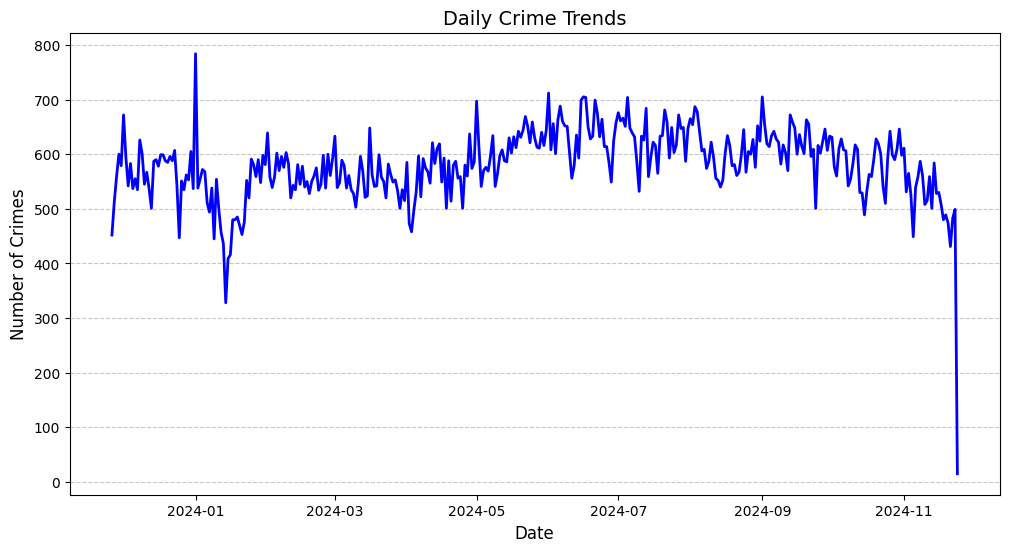

/tmp/ipykernel_2824/1230998277.py:40: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data['HOUR'] = data['DATE OF OCCURRENCE'].dt.floor('H')  # Round down to hourly time slots


Sample of Dominant Crimes by Hour:
HOUR
2023-11-26 05:00:00    MOTOR VEHICLE THEFT
2023-11-26 06:00:00                BATTERY
2023-11-26 07:00:00        CRIMINAL DAMAGE
2023-11-26 08:00:00          OTHER OFFENSE
2023-11-26 09:00:00                BATTERY
2023-11-26 10:00:00        CRIMINAL DAMAGE
2023-11-26 11:00:00                ASSAULT
2023-11-26 12:00:00                BATTERY
2023-11-26 13:00:00        THEFT OVER $500
2023-11-26 14:00:00                BATTERY
Name: OFFENSES, dtype: object
Hourly Resampled Data (Sample):
                 HOUR  WARD  TIME ENCODED   LATITUDE  LONGITUDE  \
0 2023-11-26 05:00:00     4             6  41.841842 -87.659098   
1 2023-11-26 06:00:00    36             1  41.882162 -87.692397   
2 2023-11-26 07:00:00    16             1  41.804245 -87.676719   
3 2023-11-26 08:00:00    20             1  41.886731 -87.695924   
4 2023-11-26 09:00:00    42             2  41.874353 -87.668962   

              OFFENSES  DATE OF OCCURRENCE  
0  MOTOR VEHICLE THE

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '../raw_data/preprocessed_chicago_old.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Ensure the DATE OF OCCURRENCE column is in datetime format and sort the data
data['DATE OF OCCURRENCE'] = pd.to_datetime(data['DATE OF OCCURRENCE'])
data = data.sort_values(by='DATE OF OCCURRENCE').reset_index(drop=True)

# Compute time-encoded sinusoidal transformations for cyclic features
data['TIME_SIN'] = np.sin(2 * np.pi * data['TIME ENCODED'] / 6)
data['TIME_COS'] = np.cos(2 * np.pi * data['TIME ENCODED'] / 6)

# Check for temporal continuity: Calculate time differences between consecutive entries
data['TIME_DIFF'] = data['DATE OF OCCURRENCE'].diff().dt.total_seconds()

# Aggregate data to daily resolution for trend analysis
daily_counts = data.groupby(data['DATE OF OCCURRENCE'].dt.date).size()

# Summary statistics for daily counts
daily_trends_summary = daily_counts.describe()

print("Daily Trends Summary:")
print(daily_trends_summary)

# Visualize daily crime trends (optional, requires matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
daily_counts.plot(kind='line', color='blue', linewidth=2)
plt.title('Daily Crime Trends', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Classify hourly time slots by dominant crime type
data['HOUR'] = data['DATE OF OCCURRENCE'].dt.floor('H')  # Round down to hourly time slots
hourly_dominant_crime = data.groupby('HOUR')['OFFENSES'].agg(
    lambda x: x.mode()[0] if not x.mode().empty else None
)

# Display sample of dominant crimes by hour
print("Sample of Dominant Crimes by Hour:")
print(hourly_dominant_crime.head(10))

# Prepare hourly resampled dataset for modeling
hourly_resampled = data.groupby('HOUR').agg({
    'WARD': 'first',  # Use representative ward
    'TIME ENCODED': 'first',
    'LATITUDE': 'mean',  # Average coordinates for the hour
    'LONGITUDE': 'mean',
    'OFFENSES': lambda x: x.mode()[0] if not x.mode().empty else None,  # Dominant crime type
    'DATE OF OCCURRENCE': 'first'
}).reset_index()

# Display a sample of the hourly resampled dataset
print("Hourly Resampled Data (Sample):")
print(hourly_resampled.head())

# Export the resampled dataset (optional)
#hourly_resampled.to_csv('/path/to/hourly_resampled.csv', index=False)


,HOUR,WARD,TIME ENCODED,LATITUDE,LONGITUDE,OFFENSES,DATE OF OCCURRENCE
0,2023-11-26 05:00:00,4,6,41.841842,-87.659098,MOTOR VEHICLE THEFT,2023-11-26 05:01:00
1,2023-11-26 06:00:00,36,1,41.882162,-87.692397,BATTERY,2023-11-26 06:00:00
2,2023-11-26 07:00:00,16,1,41.804245,-87.676719,CRIMINAL DAMAGE,2023-11-26 07:00:00
3,2023-11-26 08:00:00,20,1,41.886731,-87.695924,OTHER OFFENSE,2023-11-26 08:00:00
4,2023-11-26 09:00:00,42,2,41.874353,-87.668962,BATTERY,2023-11-26 09:00:00


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

# Load the dataset
file_path = '../raw_data/preprocessed_chicago_old.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Load dataset and preprocess
data['DATE'] = pd.to_datetime(data['DATE OF OCCURRENCE'])
data['HOUR'] = data['DATE'].dt.floor('h')
hourly_counts = data.groupby('HOUR').size().reset_index(name='CRIME_COUNT')
hourly_dominant_crime = data.groupby('HOUR')['OFFENSES'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Merge features
hourly_data = pd.merge(hourly_counts, hourly_dominant_crime, on='HOUR', how='left')
hourly_data['TIME_SIN'] = np.sin(2 * np.pi * hourly_data['HOUR'].dt.hour / 24)
hourly_data['TIME_COS'] = np.cos(2 * np.pi * hourly_data['HOUR'].dt.hour / 24)

# Create lagged features for time-series regression
hourly_data['CRIME_COUNT_LAG1'] = hourly_data['CRIME_COUNT'].shift(1)
hourly_data['CRIME_COUNT_LAG24'] = hourly_data['CRIME_COUNT'].shift(24)

# Drop rows with missing lagged features
hourly_data = hourly_data.dropna()

# Split features and targets
X = hourly_data[['TIME_SIN', 'TIME_COS', 'CRIME_COUNT_LAG1', 'CRIME_COUNT_LAG24']]
y_reg = hourly_data['CRIME_COUNT']
y_class = hourly_data['OFFENSES']

# Train-test split for both tasks
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_class_train, y_class_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Train regression model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_reg_train)
y_reg_pred = regressor.predict(X_test)

# Train classification model
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_class_train)
y_class_pred = classifier.predict(X_test)

# Evaluate regression
mse = mean_squared_error(y_reg_test, y_reg_pred)
print(f"Regression Mean Squared Error: {mse}")

# Evaluate classification
accuracy = accuracy_score(y_class_test, y_class_pred)
print(f"Classification Accuracy: {accuracy}")

/tmp/ipykernel_2824/617525256.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data['HOUR'] = data['DATE'].dt.floor('H')


Regression Mean Squared Error: 50.26525327836933
Classification Accuracy: 0.33926521239954077


Regression Mean Squared Error: 31.00295714126483
Classification Accuracy: 0.4058553386911596


<Figure size 1200x600 with 0 Axes>

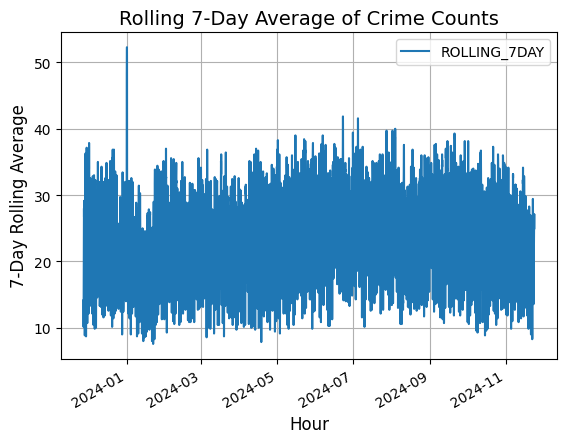

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = '../raw_data/preprocessed_chicago_old.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Ensure 'DATE OF OCCURRENCE' is in datetime format
data['DATE'] = pd.to_datetime(data['DATE OF OCCURRENCE'])

# Fix the deprecated warning, 'H' is replaced with 'h'
data['HOUR'] = data['DATE'].dt.floor('h')

# Aggregate data to hourly counts
hourly_counts = data.groupby('HOUR').size().reset_index(name='CRIME_COUNT')

# Classify dominant crime type for each hour
hourly_dominant_crime = data.groupby('HOUR')['OFFENSES'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Merge counts with dominant crime type
hourly_data = pd.merge(hourly_counts, hourly_dominant_crime, on='HOUR', how='left')

# Create time-based cyclical features (sin and cos for hour)
hourly_data['TIME_SIN'] = np.sin(2 * np.pi * hourly_data['HOUR'].dt.hour / 24)
hourly_data['TIME_COS'] = np.cos(2 * np.pi * hourly_data['HOUR'].dt.hour / 24)

# Add rolling average for crime counts (7-day rolling average)
hourly_data['ROLLING_7DAY'] = hourly_data['CRIME_COUNT'].rolling(window=7).mean()

# Add day-of-week feature
hourly_data['DAY_OF_WEEK'] = hourly_data['HOUR'].dt.dayofweek

# Create lagged features for time-series regression
hourly_data['CRIME_COUNT_LAG1'] = hourly_data['CRIME_COUNT'].shift(1)
hourly_data['CRIME_COUNT_LAG24'] = hourly_data['CRIME_COUNT'].shift(24)

# Drop rows with missing values (due to lagging and rolling averages)
hourly_data = hourly_data.dropna()

# Split features and targets
X = hourly_data[['TIME_SIN', 'TIME_COS', 'CRIME_COUNT_LAG1', 'CRIME_COUNT_LAG24', 'ROLLING_7DAY', 'DAY_OF_WEEK']]
y_reg = hourly_data['CRIME_COUNT']
y_class = hourly_data['OFFENSES']

# Split data into training and test sets
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_class_train, y_class_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Train a Random Forest Regressor for time-series regression (predict crime counts)
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_reg_train)
y_reg_pred = regressor.predict(X_test)

# Train a Random Forest Classifier for time-series classification (predict offense type)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_class_train)
y_class_pred = classifier.predict(X_test)

# Evaluate the regression model (Mean Squared Error)
mse = mean_squared_error(y_reg_test, y_reg_pred)
print(f"Regression Mean Squared Error: {mse}")

# Evaluate the classification model (Accuracy)
accuracy = accuracy_score(y_class_test, y_class_pred)
print(f"Classification Accuracy: {accuracy}")

# Optional: Visualize the rolling 7-day average of crime counts
plt.figure(figsize=(12, 6))
hourly_data[['HOUR', 'ROLLING_7DAY']].set_index('HOUR').plot()
plt.title('Rolling 7-Day Average of Crime Counts', fontsize=14)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('7-Day Rolling Average', fontsize=12)
plt.grid(True)
plt.show()


Regression Mean Squared Error: 30.37569862227325
Classification Accuracy: 0.42020665901262916


<Figure size 1200x600 with 0 Axes>

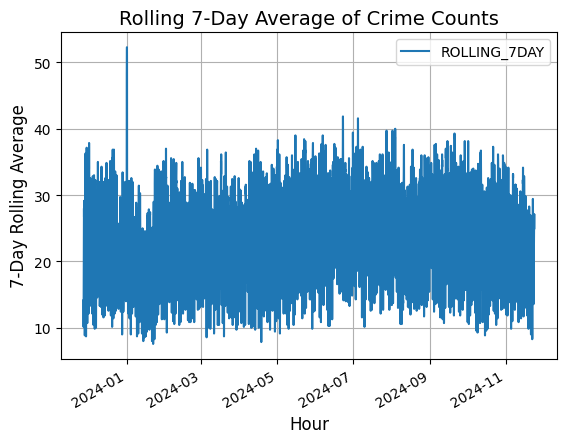

XGBoost Regression Mean Squared Error: 31.725881135274662
XGBoost Classification Accuracy: 0.4133180252583238


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb
import matplotlib.pyplot as plt

# Haversine formula to calculate distance between two lat/lon points
def haversine(lat1, lon1, lat2, lon2):
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    # Radius of Earth in kilometers
    r = 6371
    return r * c  # returns distance in kilometers

# Load the dataset
file_path = '../raw_data/preprocessed_chicago_old.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Ensure 'DATE OF OCCURRENCE' is in datetime format
data['DATE'] = pd.to_datetime(data['DATE OF OCCURRENCE'])

# Fix the deprecated warning, 'H' is replaced with 'h'
data['HOUR'] = data['DATE'].dt.floor('h')

# Aggregate data to hourly counts
hourly_counts = data.groupby('HOUR').size().reset_index(name='CRIME_COUNT')

# Classify dominant crime type for each hour
hourly_dominant_crime = data.groupby('HOUR')['OFFENSES'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Merge counts with dominant crime type
hourly_data = pd.merge(hourly_counts, hourly_dominant_crime, on='HOUR', how='left')

# Create time-based cyclical features (sin and cos for hour)
hourly_data['TIME_SIN'] = np.sin(2 * np.pi * hourly_data['HOUR'].dt.hour / 24)
hourly_data['TIME_COS'] = np.cos(2 * np.pi * hourly_data['HOUR'].dt.hour / 24)

# Add rolling average for crime counts (7-day rolling average)
hourly_data['ROLLING_7DAY'] = hourly_data['CRIME_COUNT'].rolling(window=7).mean()

# Add day-of-week feature
hourly_data['DAY_OF_WEEK'] = hourly_data['HOUR'].dt.dayofweek

# Create lagged features for time-series regression
hourly_data['CRIME_COUNT_LAG1'] = hourly_data['CRIME_COUNT'].shift(1)
hourly_data['CRIME_COUNT_LAG24'] = hourly_data['CRIME_COUNT'].shift(24)

# Drop rows with missing values (due to lagging and rolling averages)
hourly_data = hourly_data.dropna()

# Add Latitude and Longitude-based features
# Assuming 'LATITUDE' and 'LONGITUDE' columns exist in the dataset
latitude = data['LATITUDE']
longitude = data['LONGITUDE']

# Example: Calculate distance to the nearest police station or crime hotspot
# For demonstration, I'll create random coordinates for police stations
# In a real-world scenario, you should have actual police station coordinates
police_station_coords = [(41.8781, -87.6298)]  # Example: Chicago city center (replace with actual police stations)

def calculate_nearest_distance(lat, lon):
    distances = [haversine(lat, lon, station[0], station[1]) for station in police_station_coords]
    return min(distances)

# Add 'DISTANCE_TO_POLICE' column for the original data
data['DISTANCE_TO_POLICE'] = [calculate_nearest_distance(lat, lon) for lat, lon in zip(latitude, longitude)]

# Spatial Clustering (KMeans) based on latitude and longitude to find crime hotspots
coords = data[['LATITUDE', 'LONGITUDE']]
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

# Apply KMeans clustering (e.g., 5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
data['CLUSTER'] = kmeans.fit_predict(coords_scaled)

# Merge the spatial features with the hourly data
# Use groupby and transform to aggregate the spatial features correctly
hourly_data['DISTANCE_TO_POLICE'] = data.groupby('HOUR')['DISTANCE_TO_POLICE'].transform('mean')
hourly_data['CLUSTER'] = data.groupby('HOUR')['CLUSTER'].transform(lambda x: x.mode()[0] if not x.mode().empty else None)

# Now that the lengths match, you can proceed with model training
# Split features and targets for regression and classification tasks
X = hourly_data[['TIME_SIN', 'TIME_COS', 'CRIME_COUNT_LAG1', 'CRIME_COUNT_LAG24', 'ROLLING_7DAY', 'DAY_OF_WEEK', 'DISTANCE_TO_POLICE', 'CLUSTER']]
y_reg = hourly_data['CRIME_COUNT']
y_class = hourly_data['OFFENSES']

# Encode categorical offense types into numeric labels (for classification task)
label_encoder = LabelEncoder()
y_class_encoded = label_encoder.fit_transform(y_class)

# Split data into training and test sets for both tasks
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_class_train_encoded, y_class_test_encoded = train_test_split(X, y_class_encoded, test_size=0.2, random_state=42)

# Train a Random Forest Regressor for time-series regression (predict crime counts)
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_reg_train)
y_reg_pred = regressor.predict(X_test)

# Train a Random Forest Classifier for time-series classification (predict offense type)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_class_train_encoded)
y_class_pred_encoded = classifier.predict(X_test)

# Convert classification predictions back to original offense labels
y_class_pred = label_encoder.inverse_transform(y_class_pred_encoded)

# Evaluate the regression model (Mean Squared Error)
mse = mean_squared_error(y_reg_test, y_reg_pred)
print(f"Regression Mean Squared Error: {mse}")

# Evaluate the classification model (Accuracy)
accuracy = accuracy_score(y_class_test_encoded, y_class_pred_encoded)
print(f"Classification Accuracy: {accuracy}")

# Optional: Visualize the rolling 7-day average of crime counts
plt.figure(figsize=(12, 6))
hourly_data[['HOUR', 'ROLLING_7DAY']].set_index('HOUR').plot()
plt.title('Rolling 7-Day Average of Crime Counts', fontsize=14)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('7-Day Rolling Average', fontsize=12)
plt.grid(True)
plt.show()

# Optional: Using XGBoost for better performance
# Train XGBoost for regression
regressor_xgb = xgb.XGBRegressor(n_estimators=100, random_state=42)
regressor_xgb.fit(X_train, y_reg_train)
y_reg_pred_xgb = regressor_xgb.predict(X_test)

# Train XGBoost for classification
classifier_xgb = xgb.XGBClassifier(n_estimators=100, random_state=42)
classifier_xgb.fit(X_train, y_class_train_encoded)
y_class_pred_xgb_encoded = classifier_xgb.predict(X_test)

# Convert XGBoost classification predictions back to original offense labels
y_class_pred_xgb = label_encoder.inverse_transform(y_class_pred_xgb_encoded)

# Evaluate the XGBoost models
mse_xgb = mean_squared_error(y_reg_test, y_reg_pred_xgb)
accuracy_xgb = accuracy_score(y_class_test_encoded, y_class_pred_xgb_encoded)

print(f"XGBoost Regression Mean Squared Error: {mse_xgb}")
print(f"XGBoost Classification Accuracy: {accuracy_xgb}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.5s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.5s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; tota

<Figure size 1200x600 with 0 Axes>

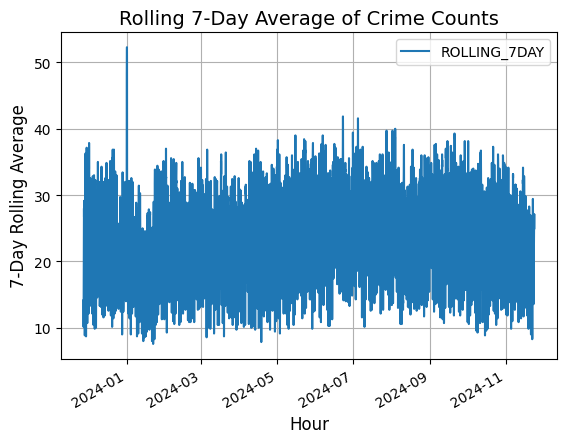

XGBoost Regression Mean Squared Error: 31.725881135274662
XGBoost Classification Accuracy: 0.4133180252583238


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb
import matplotlib.pyplot as plt

# Haversine formula to calculate distance between two lat/lon points
def haversine(lat1, lon1, lat2, lon2):
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    # Radius of Earth in kilometers
    r = 6371
    return r * c  # returns distance in kilometers

# Load the dataset
file_path = '../raw_data/preprocessed_chicago_old.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Ensure 'DATE OF OCCURRENCE' is in datetime format
data['DATE'] = pd.to_datetime(data['DATE OF OCCURRENCE'])

# Fix the deprecated warning, 'H' is replaced with 'h'
data['HOUR'] = data['DATE'].dt.floor('h')

# Aggregate data to hourly counts
hourly_counts = data.groupby('HOUR').size().reset_index(name='CRIME_COUNT')

# Classify dominant crime type for each hour
hourly_dominant_crime = data.groupby('HOUR')['OFFENSES'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Merge counts with dominant crime type
hourly_data = pd.merge(hourly_counts, hourly_dominant_crime, on='HOUR', how='left')

# Create time-based cyclical features (sin and cos for hour)
hourly_data['TIME_SIN'] = np.sin(2 * np.pi * hourly_data['HOUR'].dt.hour / 24)
hourly_data['TIME_COS'] = np.cos(2 * np.pi * hourly_data['HOUR'].dt.hour / 24)

# Add rolling average for crime counts (7-day rolling average)
hourly_data['ROLLING_7DAY'] = hourly_data['CRIME_COUNT'].rolling(window=7).mean()

# Add day-of-week feature
hourly_data['DAY_OF_WEEK'] = hourly_data['HOUR'].dt.dayofweek

# Create lagged features for time-series regression
hourly_data['CRIME_COUNT_LAG1'] = hourly_data['CRIME_COUNT'].shift(1)
hourly_data['CRIME_COUNT_LAG24'] = hourly_data['CRIME_COUNT'].shift(24)

# Drop rows with missing values (due to lagging and rolling averages)
hourly_data = hourly_data.dropna()

# Add Latitude and Longitude-based features
# Assuming 'LATITUDE' and 'LONGITUDE' columns exist in the dataset
latitude = data['LATITUDE']
longitude = data['LONGITUDE']

# Example: Calculate distance to the nearest police station or crime hotspot
# For demonstration, I'll create random coordinates for police stations
police_station_coords = [(41.8781, -87.6298)]  # Example: Chicago city center (replace with actual police stations)

def calculate_nearest_distance(lat, lon):
    distances = [haversine(lat, lon, station[0], station[1]) for station in police_station_coords]
    return min(distances)

# Add 'DISTANCE_TO_POLICE' column for the original data
data['DISTANCE_TO_POLICE'] = [calculate_nearest_distance(lat, lon) for lat, lon in zip(latitude, longitude)]

# Spatial Clustering (KMeans) based on latitude and longitude to find crime hotspots
coords = data[['LATITUDE', 'LONGITUDE']]
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

# Apply KMeans clustering (e.g., 5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
data['CLUSTER'] = kmeans.fit_predict(coords_scaled)

# Merge the spatial features with the hourly data
hourly_data['DISTANCE_TO_POLICE'] = data.groupby('HOUR')['DISTANCE_TO_POLICE'].transform('mean')
hourly_data['CLUSTER'] = data.groupby('HOUR')['CLUSTER'].transform(lambda x: x.mode()[0] if not x.mode().empty else None)

# Split features and targets for regression and classification tasks
X = hourly_data[['TIME_SIN', 'TIME_COS', 'CRIME_COUNT_LAG1', 'CRIME_COUNT_LAG24', 'ROLLING_7DAY', 'DAY_OF_WEEK', 'DISTANCE_TO_POLICE', 'CLUSTER']]
y_reg = hourly_data['CRIME_COUNT']
y_class = hourly_data['OFFENSES']

# Encode categorical offense types into numeric labels (for classification task)
label_encoder = LabelEncoder()
y_class_encoded = label_encoder.fit_transform(y_class)

# Split data into training and test sets for both tasks
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_class_train_encoded, y_class_test_encoded = train_test_split(X, y_class_encoded, test_size=0.2, random_state=42)

# Hyperparameter tuning using RandomizedSearchCV for Random Forest Regressor
param_grid_rf_regressor = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search_rf_regressor = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                                param_distributions=param_grid_rf_regressor,
                                                n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

random_search_rf_regressor.fit(X_train, y_reg_train)

# Best parameters for Random Forest Regressor
print("Best Parameters for RF Regressor:", random_search_rf_regressor.best_params_)

# Train the best model from RandomizedSearchCV
best_rf_regressor = random_search_rf_regressor.best_estimator_
y_reg_pred = best_rf_regressor.predict(X_test)

# Hyperparameter tuning using RandomizedSearchCV for Random Forest Classifier
param_grid_rf_classifier = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search_rf_classifier = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                                 param_distributions=param_grid_rf_classifier,
                                                 n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

random_search_rf_classifier.fit(X_train, y_class_train_encoded)

# Best parameters for Random Forest Classifier
print("Best Parameters for RF Classifier:", random_search_rf_classifier.best_params_)

# Train the best model from RandomizedSearchCV
best_rf_classifier = random_search_rf_classifier.best_estimator_
y_class_pred_encoded = best_rf_classifier.predict(X_test)

# Convert classification predictions back to original offense labels
y_class_pred = label_encoder.inverse_transform(y_class_pred_encoded)

# Evaluate the regression model (Mean Squared Error)
mse = mean_squared_error(y_reg_test, y_reg_pred)
print(f"Regression Mean Squared Error: {mse}")

# Evaluate the classification model (Accuracy)
accuracy = accuracy_score(y_class_test_encoded, y_class_pred_encoded)
print(f"Classification Accuracy: {accuracy}")

# Optional: Visualize the rolling 7-day average of crime counts
plt.figure(figsize=(12, 6))
hourly_data[['HOUR', 'ROLLING_7DAY']].set_index('HOUR').plot()
plt.title('Rolling 7-Day Average of Crime Counts', fontsize=14)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('7-Day Rolling Average', fontsize=12)
plt.grid(True)
plt.show()

# Optional: Using XGBoost for better performance
# Train XGBoost for regression
regressor_xgb = xgb.XGBRegressor(n_estimators=100, random_state=42)
regressor_xgb.fit(X_train, y_reg_train)
y_reg_pred_xgb = regressor_xgb.predict(X_test)

# Train XGBoost for classification
classifier_xgb = xgb.XGBClassifier(n_estimators=100, random_state=42)
classifier_xgb.fit(X_train, y_class_train_encoded)
y_class_pred_xgb_encoded = classifier_xgb.predict(X_test)

# Convert XGBoost classification predictions back to original offense labels
y_class_pred_xgb = label_encoder.inverse_transform(y_class_pred_xgb_encoded)

# Evaluate the XGBoost models
mse_xgb = mean_squared_error(y_reg_test, y_reg_pred_xgb)
accuracy_xgb = accuracy_score(y_class_test_encoded, y_class_pred_xgb_encoded)

print(f"XGBoost Regression Mean Squared Error: {mse_xgb}")
print(f"XGBoost Classification Accuracy: {accuracy_xgb}")


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

# Haversine formula to calculate distance between two lat/lon points
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return r * c

# Load dataset
file_path = '../raw_data/preprocessed_chicago_old.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Ensure 'DATE OF OCCURRENCE' is in datetime format
data['DATE'] = pd.to_datetime(data['DATE OF OCCURRENCE'])
data['HOUR'] = data['DATE'].dt.floor('h')

# Aggregate data to hourly counts
hourly_counts = data.groupby('HOUR').size().reset_index(name='CRIME_COUNT')
hourly_dominant_crime = data.groupby('HOUR')['OFFENSES'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Merge counts with dominant crime type
hourly_data = pd.merge(hourly_counts, hourly_dominant_crime, on='HOUR', how='left')

# Create cyclical features
hourly_data['TIME_SIN'] = np.sin(2 * np.pi * hourly_data['HOUR'].dt.hour / 24)
hourly_data['TIME_COS'] = np.cos(2 * np.pi * hourly_data['HOUR'].dt.hour / 24)
hourly_data['ROLLING_7DAY'] = hourly_data['CRIME_COUNT'].rolling(window=7).mean()
hourly_data['DAY_OF_WEEK'] = hourly_data['HOUR'].dt.dayofweek
hourly_data['CRIME_COUNT_LAG1'] = hourly_data['CRIME_COUNT'].shift(1)
hourly_data['CRIME_COUNT_LAG24'] = hourly_data['CRIME_COUNT'].shift(24)

# Drop NaN values
hourly_data = hourly_data.dropna()

# Add Latitude and Longitude-based features
latitude = data['LATITUDE']
longitude = data['LONGITUDE']
police_station_coords = [(41.8781, -87.6298)]  # Example: Chicago city center (replace with actual coordinates)

def calculate_nearest_distance(lat, lon):
    distances = [haversine(lat, lon, station[0], station[1]) for station in police_station_coords]
    return min(distances)

data['DISTANCE_TO_POLICE'] = [calculate_nearest_distance(lat, lon) for lat, lon in zip(latitude, longitude)]

# Spatial Clustering (KMeans) based on latitude and longitude
coords = data[['LATITUDE', 'LONGITUDE']]
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

kmeans = KMeans(n_clusters=5, random_state=42)
data['CLUSTER'] = kmeans.fit_predict(coords_scaled)

# Merge spatial features with hourly data
hourly_data['DISTANCE_TO_POLICE'] = data.groupby('HOUR')['DISTANCE_TO_POLICE'].transform('mean')
hourly_data['CLUSTER'] = data.groupby('HOUR')['CLUSTER'].transform(lambda x: x.mode()[0] if not x.mode().empty else None)

# Feature matrix and target variable for regression and classification
X = hourly_data[['TIME_SIN', 'TIME_COS', 'CRIME_COUNT_LAG1', 'CRIME_COUNT_LAG24', 'ROLLING_7DAY', 'DAY_OF_WEEK', 'DISTANCE_TO_POLICE', 'CLUSTER']]
y_reg = hourly_data['CRIME_COUNT']
y_class = hourly_data['OFFENSES']

# Encode categorical offense types into numeric labels (for classification)
label_encoder = LabelEncoder()
y_class_encoded = label_encoder.fit_transform(y_class)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_class_res = smote.fit_resample(X, y_class_encoded)

# Split data using StratifiedKFold for classification task
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
regressor = RandomForestRegressor(n_estimators=200, random_state=42)
classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Evaluate regression model using cross-validation
cv_scores_reg = cross_val_score(regressor, X, y_reg, cv=5, scoring='neg_mean_squared_error')
mse_cv = -np.mean(cv_scores_reg)
print(f"Regression Cross-Validation Mean Squared Error: {mse_cv}")

# Evaluate classification model using cross-validation
cv_scores_class = cross_val_score(classifier, X_res, y_class_res, cv=skf, scoring='accuracy')
class_accuracy_cv = np.mean(cv_scores_class)
print(f"Classification Cross-Validation Accuracy: {class_accuracy_cv}")

# Hyperparameter Tuning (RandomForest)
from sklearn.model_selection import RandomizedSearchCV

param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist_rf, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search_rf.fit(X_res, y_class_res)
print(f"Best Parameters for RF Classifier: {random_search_rf.best_params_}")

# Fit and predict using the best model from RandomizedSearchCV
best_rf_classifier = random_search_rf.best_estimator_
best_rf_classifier.fit(X_res, y_class_res)
y_class_pred = best_rf_classifier.predict(X)

# Evaluate classification model (Accuracy)
accuracy = accuracy_score(y_class_encoded, y_class_pred)
print(f"Best RF Classification Accuracy: {accuracy}")

# Optional: Using XGBoost for better performance
regressor_xgb = xgb.XGBRegressor(n_estimators=100, random_state=42)
regressor_xgb.fit(X, y_reg)
y_reg_pred_xgb = regressor_xgb.predict(X)

classifier_xgb = xgb.XGBClassifier(n_estimators=100, random_state=42)
classifier_xgb.fit(X_res, y_class_res)
y_class_pred_xgb = classifier_xgb.predict(X)

# Evaluate the XGBoost models
mse_xgb = mean_squared_error(y_reg, y_reg_pred_xgb)
accuracy_xgb = accuracy_score(y_class_encoded, y_class_pred_xgb)
print(f"XGBoost Regression MSE: {mse_xgb}")
print(f"XGBoost Classification Accuracy: {accuracy_xgb}")


Regression Cross-Validation Mean Squared Error: 28.04345277239812
Classification Cross-Validation Accuracy: 0.8050547908739716
Best Parameters for RF Classifier: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}
Best RF Classification Accuracy: 0.9987366486734811
XGBoost Regression MSE: 10.7907259128197
XGBoost Classification Accuracy: 0.7711037096588952


Regression Cross-Validation Mean Squared Error: 28.017594730099564
Classification Cross-Validation Accuracy: 0.7320008431037874
Best Parameters for RF Classifier: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}
Best RF Classification Accuracy: 0.998787615021139
XGBoost Regression MSE: 10.374566494403323
XGBoost Classification Accuracy: 0.861415070877891


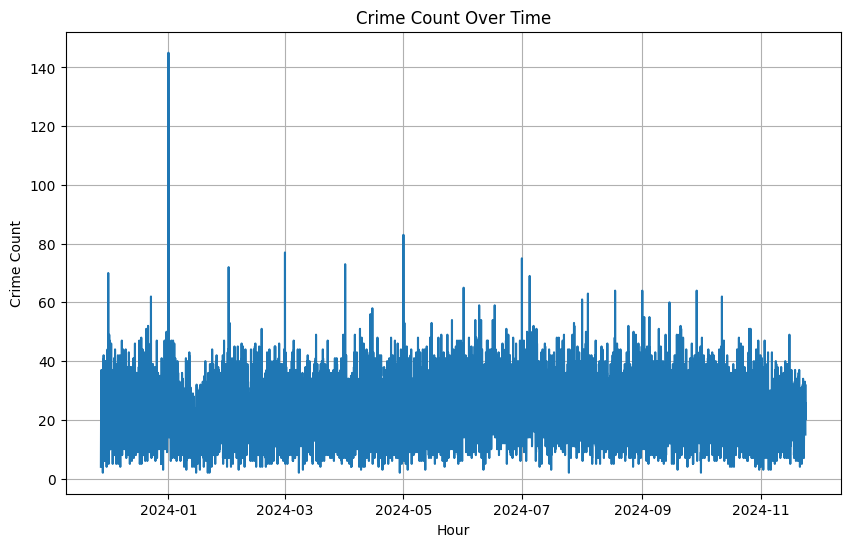

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics.pairwise import haversine_distances

# Haversine formula to calculate distance between two lat/lon points
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return r * c

# Police District Latitude and Longitude Data
districts_data = {
    'District': [
        'District 1 (Central)', 'District 2 (Wentworth)', 'District 3 (Grand Crossing)',
        'District 4 (South Chicago)', 'District 5 (Calumet)', 'District 6 (Gresham)',
        'District 7 (Englewood)', 'District 8 (Chicago Lawn)', 'District 9 (Deering)',
        'District 10 (Ogden)', 'District 11 (Harrison)', 'District 12 (Near West Side)',
        'District 13 (Jefferson Park)', 'District 14 (Shakespeare)', 'District 15 (Austin)',
        'District 16 (Albion Park)', 'District 17 (Woodlawn)', 'District 18 (Pullman)',
        'District 19 (Southwest)', 'District 20 (North Lawndale)', 'District 21 (Near North Side)',
        'District 22 (Lincoln Park)'
    ],
    'Latitude': [
        41.8345, 41.8027, 41.752, 41.7531, 41.7365, 41.7445, 41.7843, 41.7794, 41.827, 41.8782,
        41.8589, 41.8844, 41.8914, 41.8986, 41.8763, 41.9762, 41.7874, 41.7317, 41.794, 41.8655,
        41.9264, 41.9252
    ],
    'Longitude': [
        -87.6216, -87.6185, -87.6001, -87.5573, -87.607, -87.6616, -87.6745, -87.6864, -87.667,
        -87.7119, -87.7107, -87.6456, -87.7377, -87.6743, -87.7724, -87.7243, -87.592, -87.6079,
        -87.74, -87.7111, -87.6482, -87.6549
    ]
}

districts_df = pd.DataFrame(districts_data)

# Convert latitude and longitude to radians for haversine distance calculation
districts_df['Latitude_rad'] = np.radians(districts_df['Latitude'])
districts_df['Longitude_rad'] = np.radians(districts_df['Longitude'])

# Load your dataset (adjust the path accordingly)
file_path = '../raw_data/preprocessed_chicago_old.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Ensure 'DATE OF OCCURRENCE' is in datetime format
data['DATE'] = pd.to_datetime(data['DATE OF OCCURRENCE'])
data['HOUR'] = data['DATE'].dt.floor('h')

# Aggregate data to hourly counts
hourly_counts = data.groupby('HOUR').size().reset_index(name='CRIME_COUNT')
hourly_dominant_crime = data.groupby('HOUR')['OFFENSES'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Merge counts with dominant crime type
hourly_data = pd.merge(hourly_counts, hourly_dominant_crime, on='HOUR', how='left')

# Create cyclical features
hourly_data['TIME_SIN'] = np.sin(2 * np.pi * hourly_data['HOUR'].dt.hour / 24)
hourly_data['TIME_COS'] = np.cos(2 * np.pi * hourly_data['HOUR'].dt.hour / 24)
hourly_data['ROLLING_7DAY'] = hourly_data['CRIME_COUNT'].rolling(window=7).mean()
hourly_data['DAY_OF_WEEK'] = hourly_data['HOUR'].dt.dayofweek
hourly_data['CRIME_COUNT_LAG1'] = hourly_data['CRIME_COUNT'].shift(1)
hourly_data['CRIME_COUNT_LAG24'] = hourly_data['CRIME_COUNT'].shift(24)

# Drop NaN values
hourly_data = hourly_data.dropna()

# Add Latitude and Longitude-based features
latitude = data['LATITUDE']
longitude = data['LONGITUDE']

# Function to calculate the nearest police district distance using Haversine formula
def calculate_nearest_district_distance(crime_lat, crime_lon, districts_df):
    distances = haversine_distances(
        np.array([[crime_lat, crime_lon]]),
        np.array(list(zip(districts_df['Latitude_rad'], districts_df['Longitude_rad'])))
    )
    distances_km = distances * 6371  # Convert radians to kilometers
    nearest_district_index = np.argmin(distances_km)  # Find the index of the nearest district
    return distances_km[0][nearest_district_index], districts_df['District'].iloc[nearest_district_index]

# Apply the distance calculation to each crime location in your data
data['DISTANCE_TO_NEAREST_DISTRICT'], data['NEAREST_DISTRICT'] = zip(*data.apply(
    lambda row: calculate_nearest_district_distance(row['LATITUDE'], row['LONGITUDE'], districts_df), axis=1))

# Merge spatial features with hourly data
hourly_data['DISTANCE_TO_POLICE'] = data.groupby('HOUR')['DISTANCE_TO_NEAREST_DISTRICT'].transform('mean')

# Feature matrix and target variable for regression and classification
X = hourly_data[['TIME_SIN', 'TIME_COS', 'CRIME_COUNT_LAG1', 'CRIME_COUNT_LAG24', 'ROLLING_7DAY', 'DAY_OF_WEEK', 'DISTANCE_TO_POLICE']]
y_reg = hourly_data['CRIME_COUNT']
y_class = hourly_data['OFFENSES']

# Encode categorical offense types into numeric labels (for classification)
label_encoder = LabelEncoder()
y_class_encoded = label_encoder.fit_transform(y_class)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_class_res = smote.fit_resample(X, y_class_encoded)

# Split data using StratifiedKFold for classification task
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
regressor = RandomForestRegressor(n_estimators=200, random_state=42)
classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Evaluate regression model using cross-validation
cv_scores_reg = cross_val_score(regressor, X, y_reg, cv=5, scoring='neg_mean_squared_error')
mse_cv = -np.mean(cv_scores_reg)
print(f"Regression Cross-Validation Mean Squared Error: {mse_cv}")

# Evaluate classification model using cross-validation
cv_scores_class = cross_val_score(classifier, X_res, y_class_res, cv=skf, scoring='accuracy')
class_accuracy_cv = np.mean(cv_scores_class)
print(f"Classification Cross-Validation Accuracy: {class_accuracy_cv}")

# Hyperparameter Tuning (RandomForest)
from sklearn.model_selection import RandomizedSearchCV

param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist_rf, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search_rf.fit(X_res, y_class_res)
print(f"Best Parameters for RF Classifier: {random_search_rf.best_params_}")

# Fit and predict using the best model from RandomizedSearchCV
best_rf_classifier = random_search_rf.best_estimator_
best_rf_classifier.fit(X_res, y_class_res)
y_class_pred = best_rf_classifier.predict(X_res)

# Best Model Accuracy
best_rf_accuracy = accuracy_score(y_class_res, y_class_pred)
print(f"Best RF Classification Accuracy: {best_rf_accuracy}")

# XGBoost for regression
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_regressor.fit(X, y_reg)
y_reg_pred = xgb_regressor.predict(X)
xgb_mse = mean_squared_error(y_reg, y_reg_pred)
print(f"XGBoost Regression MSE: {xgb_mse}")

# XGBoost for classification
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', random_state=42)
xgb_classifier.fit(X_res, y_class_res)
y_class_pred_xgb = xgb_classifier.predict(X_res)
xgb_accuracy = accuracy_score(y_class_res, y_class_pred_xgb)
print(f"XGBoost Classification Accuracy: {xgb_accuracy}")

# Plotting crime count over time
plt.figure(figsize=(10, 6))
plt.plot(hourly_data['HOUR'], hourly_data['CRIME_COUNT'])
plt.title("Crime Count Over Time")
plt.xlabel("Hour")
plt.ylabel("Crime Count")
plt.grid(True)
plt.show()

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, VotingClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

# Haversine formula to calculate distance between two lat/lon points
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return r * c

# 22 Police District Coordinates
police_districts = {
    "District 1 (Central)": (41.8345, -87.6216),
    "District 2 (Wentworth)": (41.8027, -87.6185),
    "District 3 (Grand Crossing)": (41.752, -87.6001),
    "District 4 (South Chicago)": (41.7531, -87.5573),
    "District 5 (Calumet)": (41.7365, -87.607),
    "District 6 (Gresham)": (41.7445, -87.6616),
    "District 7 (Englewood)": (41.7843, -87.6745),
    "District 8 (Chicago Lawn)": (41.7794, -87.6864),
    "District 9 (Deering)": (41.827, -87.667),
    "District 10 (Ogden)": (41.8782, -87.7119),
    "District 11 (Harrison)": (41.8589, -87.7107),
    "District 12 (Near West Side)": (41.8844, -87.6456),
    "District 13 (Jefferson Park)": (41.8914, -87.7377),
    "District 14 (Shakespeare)": (41.8986, -87.6743),
    "District 15 (Austin)": (41.8763, -87.7724),
    "District 16 (Albion Park)": (41.9762, -87.7243),
    "District 17 (Woodlawn)": (41.7874, -87.592),
    "District 18 (Pullman)": (41.7317, -87.6079),
    "District 19 (Southwest)": (41.794, -87.74),
    "District 20 (North Lawndale)": (41.8655, -87.7111),
    "District 21 (Near North Side)": (41.9264, -87.6482),
    "District 22 (Lincoln Park)": (41.9252, -87.6549),
}

# Convert dictionary to a DataFrame
police_stations_df = pd.DataFrame(list(police_districts.items()), columns=["District", "Coordinates"])
police_stations_df["Latitude"] = police_stations_df["Coordinates"].apply(lambda x: x[0])
police_stations_df["Longitude"] = police_stations_df["Coordinates"].apply(lambda x: x[1])

# Load dataset
file_path = '../raw_data/preprocessed_chicago_old.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Ensure 'DATE OF OCCURRENCE' is in datetime format
data['DATE'] = pd.to_datetime(data['DATE OF OCCURRENCE'])
data['HOUR'] = data['DATE'].dt.floor('h')

# Aggregate data to hourly counts
hourly_counts = data.groupby('HOUR').size().reset_index(name='CRIME_COUNT')
hourly_dominant_crime = data.groupby('HOUR')['OFFENSES'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Merge counts with dominant crime type
hourly_data = pd.merge(hourly_counts, hourly_dominant_crime, on='HOUR', how='left')

# Create cyclical features
hourly_data['TIME_SIN'] = np.sin(2 * np.pi * hourly_data['HOUR'].dt.hour / 24)
hourly_data['TIME_COS'] = np.cos(2 * np.pi * hourly_data['HOUR'].dt.hour / 24)
hourly_data['ROLLING_7DAY'] = hourly_data['CRIME_COUNT'].rolling(window=7).mean()
hourly_data['DAY_OF_WEEK'] = hourly_data['HOUR'].dt.dayofweek
hourly_data['CRIME_COUNT_LAG1'] = hourly_data['CRIME_COUNT'].shift(1)
hourly_data['CRIME_COUNT_LAG24'] = hourly_data['CRIME_COUNT'].shift(24)

# Drop NaN values
hourly_data = hourly_data.dropna()

# Add Latitude and Longitude-based features for Police District
latitude = data['LATITUDE']
longitude = data['LONGITUDE']

def calculate_nearest_district(lat, lon):
    distances = [haversine(lat, lon, district[0], district[1]) for district in police_districts.values()]
    return min(distances)

data['DISTANCE_TO_POLICE'] = [calculate_nearest_district(lat, lon) for lat, lon in zip(latitude, longitude)]

# Spatial Clustering (KMeans) based on latitude and longitude
coords = data[['LATITUDE', 'LONGITUDE']]
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

kmeans = KMeans(n_clusters=5, random_state=42)
data['CLUSTER'] = kmeans.fit_predict(coords_scaled)

# Merge spatial features with hourly data
hourly_data['DISTANCE_TO_POLICE'] = data.groupby('HOUR')['DISTANCE_TO_POLICE'].transform('mean')
hourly_data['CLUSTER'] = data.groupby('HOUR')['CLUSTER'].transform(lambda x: x.mode()[0] if not x.mode().empty else None)

# Feature matrix and target variable for regression and classification
X = hourly_data[['TIME_SIN', 'TIME_COS', 'CRIME_COUNT_LAG1', 'CRIME_COUNT_LAG24', 'ROLLING_7DAY', 'DAY_OF_WEEK', 'DISTANCE_TO_POLICE', 'CLUSTER']]
y_reg = hourly_data['CRIME_COUNT']
y_class = hourly_data['OFFENSES']

# Encode categorical offense types into numeric labels (for classification)
label_encoder = LabelEncoder()
y_class_encoded = label_encoder.fit_transform(y_class)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_class_res = smote.fit_resample(X, y_class_encoded)

# Split data using StratifiedKFold for classification task
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
regressor = RandomForestRegressor(n_estimators=200, random_state=42)
classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Evaluate regression model using cross-validation
cv_scores_reg = cross_val_score(regressor, X, y_reg, cv=5, scoring='neg_mean_squared_error')
mse_cv = -np.mean(cv_scores_reg)
print(f"Regression Cross-Validation Mean Squared Error: {mse_cv}")

# Evaluate classification model using cross-validation
cv_scores_class = cross_val_score(classifier, X_res, y_class_res, cv=skf, scoring='accuracy')
class_accuracy_cv = np.mean(cv_scores_class)
print(f"Classification Cross-Validation Accuracy: {class_accuracy_cv}")

# Hyperparameter Tuning (RandomForest)
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist_rf, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search_rf.fit(X_res, y_class_res)
print(f"Best Parameters for RF Classifier: {random_search_rf.best_params_}")

# Fit and predict using the best model from RandomizedSearchCV
best_rf_classifier = random_search_rf.best_estimator_
best_rf_classifier.fit(X_res, y_class_res)
y_class_pred = best_rf_classifier.predict(X)

# Evaluate classification model (Accuracy)
accuracy = accuracy_score(y_class_encoded, y_class_pred)
print(f"Best RF Classification Accuracy: {accuracy}")

# Optional: Using XGBoost for better performance
regressor_xgb = xgb.XGBRegressor(n_estimators=100, random_state=42)
regressor_xgb.fit(X, y_reg)
y_reg_pred_xgb = regressor_xgb.predict(X)

classifier_xgb = xgb.XGBClassifier(n_estimators=100, random_state=42)
classifier_xgb.fit(X_res, y_class_res)
y_class_pred_xgb = classifier_xgb.predict(X)

# Evaluate the XGBoost models
mse_xgb = mean_squared_error(y_reg, y_reg_pred_xgb)
accuracy_xgb = accuracy_score(y_class_encoded, y_class_pred_xgb)
print(f"XGBoost Regression MSE: {mse_xgb}")
print(f"XGBoost Classification Accuracy: {accuracy_xgb}")


Regression Cross-Validation Mean Squared Error: 28.287484352227068
Classification Cross-Validation Accuracy: 0.8027854123523112
Best Parameters for RF Classifier: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}
Best RF Classification Accuracy: 0.9986217985528885
XGBoost Regression MSE: 10.116778130447594
XGBoost Classification Accuracy: 0.7750086137590444


Regression Cross-Validation Mean Squared Error: 30.181014774575498
Classification Cross-Validation Accuracy: 0.8027854123523112
Best Parameters for RF Classifier: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}
Best RF Classification Accuracy: 0.9986217985528885
XGBoost Regression MSE: 10.116778130447594

Final Model Evaluation:
XGBoost Regression MSE: 10.116778130447594
Best RF Classification Accuracy: 0.9986217985528885


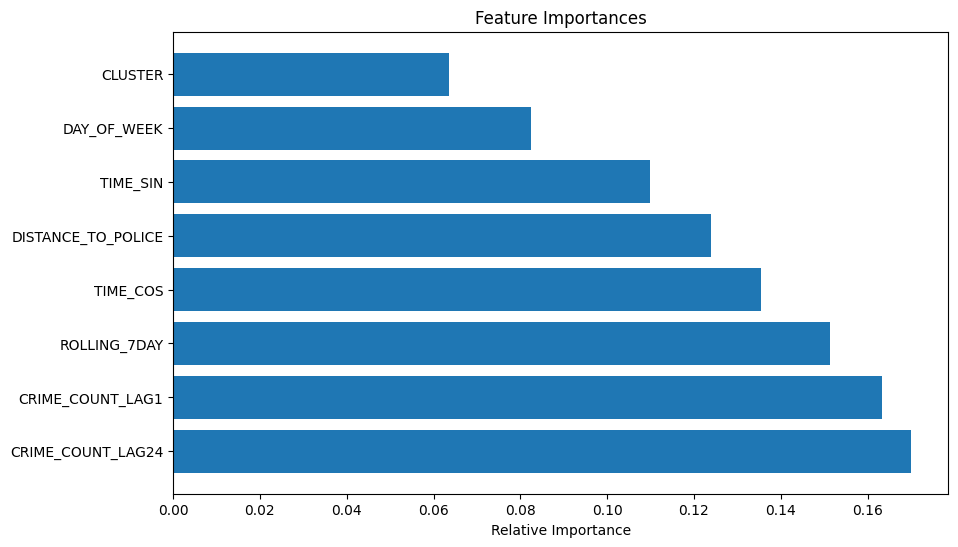

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Haversine formula to calculate distance between two lat/lon points
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return r * c

# Define police districts with coordinates
police_districts = {
    "District 1 (Central)": (41.8345, -87.6216),
    "District 2 (Wentworth)": (41.8027, -87.6185),
    "District 3 (Grand Crossing)": (41.752, -87.6001),
    "District 4 (South Chicago)": (41.7531, -87.5573),
    "District 5 (Calumet)": (41.7365, -87.607),
    "District 6 (Gresham)": (41.7445, -87.6616),
    "District 7 (Englewood)": (41.7843, -87.6745),
    "District 8 (Chicago Lawn)": (41.7794, -87.6864),
    "District 9 (Deering)": (41.827, -87.667),
    "District 10 (Ogden)": (41.8782, -87.7119),
    "District 11 (Harrison)": (41.8589, -87.7107),
    "District 12 (Near West Side)": (41.8844, -87.6456),
    "District 13 (Jefferson Park)": (41.8914, -87.7377),
    "District 14 (Shakespeare)": (41.8986, -87.6743),
    "District 15 (Austin)": (41.8763, -87.7724),
    "District 16 (Albion Park)": (41.9762, -87.7243),
    "District 17 (Woodlawn)": (41.7874, -87.592),
    "District 18 (Pullman)": (41.7317, -87.6079),
    "District 19 (Southwest)": (41.794, -87.74),
    "District 20 (North Lawndale)": (41.8655, -87.7111),
    "District 21 (Near North Side)": (41.9264, -87.6482),
    "District 22 (Lincoln Park)": (41.9252, -87.6549),
}

# Load dataset
file_path = '../raw_data/preprocessed_chicago_old.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Ensure 'DATE OF OCCURRENCE' is in datetime format
data['DATE'] = pd.to_datetime(data['DATE OF OCCURRENCE'])
data['HOUR'] = data['DATE'].dt.floor('h')

# Aggregate data to hourly counts
hourly_counts = data.groupby('HOUR').size().reset_index(name='CRIME_COUNT')
hourly_dominant_crime = data.groupby('HOUR')['OFFENSES'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Merge counts with dominant crime type
hourly_data = pd.merge(hourly_counts, hourly_dominant_crime, on='HOUR', how='left')

# Create cyclical features
hourly_data['TIME_SIN'] = np.sin(2 * np.pi * hourly_data['HOUR'].dt.hour / 24)
hourly_data['TIME_COS'] = np.cos(2 * np.pi * hourly_data['HOUR'].dt.hour / 24)
hourly_data['ROLLING_7DAY'] = hourly_data['CRIME_COUNT'].rolling(window=7).mean()
hourly_data['DAY_OF_WEEK'] = hourly_data['HOUR'].dt.dayofweek
hourly_data['CRIME_COUNT_LAG1'] = hourly_data['CRIME_COUNT'].shift(1)
hourly_data['CRIME_COUNT_LAG24'] = hourly_data['CRIME_COUNT'].shift(24)

# Drop NaN values
hourly_data = hourly_data.dropna()

# Add Latitude and Longitude-based features
latitude = data['LATITUDE']
longitude = data['LONGITUDE']

def calculate_nearest_distance(lat, lon):
    distances = [haversine(lat, lon, station[0], station[1]) for station in police_districts.values()]
    return min(distances)

data['DISTANCE_TO_POLICE'] = [calculate_nearest_distance(lat, lon) for lat, lon in zip(latitude, longitude)]

# Spatial Clustering (KMeans) based on latitude and longitude
coords = data[['LATITUDE', 'LONGITUDE']]
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

kmeans = KMeans(n_clusters=5, random_state=42)
data['CLUSTER'] = kmeans.fit_predict(coords_scaled)

# Merge spatial features with hourly data
hourly_data['DISTANCE_TO_POLICE'] = data.groupby('HOUR')['DISTANCE_TO_POLICE'].transform('mean')
hourly_data['CLUSTER'] = data.groupby('HOUR')['CLUSTER'].transform(lambda x: x.mode()[0] if not x.mode().empty else None)

# Feature matrix and target variable for regression and classification
X = hourly_data[['TIME_SIN', 'TIME_COS', 'CRIME_COUNT_LAG1', 'CRIME_COUNT_LAG24', 'ROLLING_7DAY', 'DAY_OF_WEEK', 'DISTANCE_TO_POLICE', 'CLUSTER']]
y_reg = hourly_data['CRIME_COUNT']
y_class = hourly_data['OFFENSES']

# Encode categorical offense types into numeric labels (for classification)
label_encoder = LabelEncoder()
y_class_encoded = label_encoder.fit_transform(y_class)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_class_res = smote.fit_resample(X, y_class_encoded)

# Split data using StratifiedKFold for classification task
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Initialize models
regressor = xgb.XGBRegressor(n_estimators=100, random_state=42)
classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Evaluate regression model using cross-validation
cv_scores_reg = cross_val_score(regressor, X, y_reg, cv=5, scoring='neg_mean_squared_error')
mse_cv = -np.mean(cv_scores_reg)
print(f"Regression Cross-Validation Mean Squared Error: {mse_cv}")

# Evaluate classification model using cross-validation
cv_scores_class = cross_val_score(classifier, X_res, y_class_res, cv=skf, scoring='accuracy')
class_accuracy_cv = np.mean(cv_scores_class)
print(f"Classification Cross-Validation Accuracy: {class_accuracy_cv}")

# Hyperparameter Tuning (RandomForest for Classification)
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist_rf, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search_rf.fit(X_res, y_class_res)
print(f"Best Parameters for RF Classifier: {random_search_rf.best_params_}")

# Fit and predict using the best model from RandomizedSearchCV
best_rf_classifier = random_search_rf.best_estimator_
best_rf_classifier.fit(X_res, y_class_res)
y_class_pred = best_rf_classifier.predict(X)

# Evaluate classification model (Accuracy)
accuracy = accuracy_score(y_class_encoded, y_class_pred)
print(f"Best RF Classification Accuracy: {accuracy}")

# Optional: Using XGBoost for better performance (Regression)
regressor_xgb = xgb.XGBRegressor(n_estimators=100, random_state=42)
regressor_xgb.fit(X, y_reg)
y_reg_pred_xgb = regressor_xgb.predict(X)

# Evaluate the XGBoost models
mse_xgb = mean_squared_error(y_reg, y_reg_pred_xgb)
print(f"XGBoost Regression MSE: {mse_xgb}")

# Final model evaluation
print("\nFinal Model Evaluation:")
print(f"XGBoost Regression MSE: {mse_xgb}")
print(f"Best RF Classification Accuracy: {accuracy}")

# Visualize feature importance for the RandomForestClassifier
importances = best_rf_classifier.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), features[indices])
plt.xlabel("Relative Importance")
plt.show()

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Haversine formula to calculate distance between two lat/lon points
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return r * c

# Define police districts with coordinates
police_districts = {
    "District 1 (Central)": (41.8345, -87.6216),
    "District 2 (Wentworth)": (41.8027, -87.6185),
    "District 3 (Grand Crossing)": (41.752, -87.6001),
    "District 4 (South Chicago)": (41.7531, -87.5573),
    "District 5 (Calumet)": (41.7365, -87.607),
    "District 6 (Gresham)": (41.7445, -87.6616),
    "District 7 (Englewood)": (41.7843, -87.6745),
    "District 8 (Chicago Lawn)": (41.7794, -87.6864),
    "District 9 (Deering)": (41.827, -87.667),
    "District 10 (Ogden)": (41.8782, -87.7119),
    "District 11 (Harrison)": (41.8589, -87.7107),
    "District 12 (Near West Side)": (41.8844, -87.6456),
    "District 13 (Jefferson Park)": (41.8914, -87.7377),
    "District 14 (Shakespeare)": (41.8986, -87.6743),
    "District 15 (Austin)": (41.8763, -87.7724),
    "District 16 (Albion Park)": (41.9762, -87.7243),
    "District 17 (Woodlawn)": (41.7874, -87.592),
    "District 18 (Pullman)": (41.7317, -87.6079),
    "District 19 (Southwest)": (41.794, -87.74),
    "District 20 (North Lawndale)": (41.8655, -87.7111),
    "District 21 (Near North Side)": (41.9264, -87.6482),
    "District 22 (Lincoln Park)": (41.9252, -87.6549),
}

# Load dataset
file_path = '../raw_data/preprocessed_chicago_old.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Ensure 'DATE OF OCCURRENCE' is in datetime format
data['DATE'] = pd.to_datetime(data['DATE OF OCCURRENCE'])
data['HOUR'] = data['DATE'].dt.floor('h')

# Aggregate data to hourly counts
hourly_counts = data.groupby('HOUR').size().reset_index(name='CRIME_COUNT')
hourly_dominant_crime = data.groupby('HOUR')['OFFENSES'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Merge counts with dominant crime type
hourly_data = pd.merge(hourly_counts, hourly_dominant_crime, on='HOUR', how='left')

# Create cyclical features
hourly_data['TIME_SIN'] = np.sin(2 * np.pi * hourly_data['HOUR'].dt.hour / 24)
hourly_data['TIME_COS'] = np.cos(2 * np.pi * hourly_data['HOUR'].dt.hour / 24)
hourly_data['ROLLING_7DAY'] = hourly_data['CRIME_COUNT'].rolling(window=7).mean()
hourly_data['DAY_OF_WEEK'] = hourly_data['HOUR'].dt.dayofweek
hourly_data['CRIME_COUNT_LAG1'] = hourly_data['CRIME_COUNT'].shift(1)
hourly_data['CRIME_COUNT_LAG24'] = hourly_data['CRIME_COUNT'].shift(24)

# Drop NaN values
hourly_data = hourly_data.dropna()

# Add Latitude and Longitude-based features
latitude = data['LATITUDE']
longitude = data['LONGITUDE']

def calculate_nearest_distance(lat, lon):
    distances = [haversine(lat, lon, station[0], station[1]) for station in police_districts.values()]
    return min(distances)

data['DISTANCE_TO_POLICE'] = [calculate_nearest_distance(lat, lon) for lat, lon in zip(latitude, longitude)]

# Spatial Clustering (KMeans) based on latitude and longitude
coords = data[['LATITUDE', 'LONGITUDE']]
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

kmeans = KMeans(n_clusters=5, random_state=42)
data['CLUSTER'] = kmeans.fit_predict(coords_scaled)

# Merge spatial features with hourly data
hourly_data['DISTANCE_TO_POLICE'] = data.groupby('HOUR')['DISTANCE_TO_POLICE'].transform('mean')
hourly_data['CLUSTER'] = data.groupby('HOUR')['CLUSTER'].transform(lambda x: x.mode()[0] if not x.mode().empty else None)

# Feature matrix and target variable for regression and classification
X = hourly_data[['TIME_SIN', 'TIME_COS', 'CRIME_COUNT_LAG1', 'CRIME_COUNT_LAG24', 'ROLLING_7DAY', 'DAY_OF_WEEK', 'DISTANCE_TO_POLICE', 'CLUSTER']]
y_reg = hourly_data['CRIME_COUNT']
y_class = hourly_data['OFFENSES']

# Encode categorical offense types into numeric labels (for classification)
label_encoder = LabelEncoder()
y_class_encoded = label_encoder.fit_transform(y_class)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_class_res = smote.fit_resample(X, y_class_encoded)

#       # Split the data into training, testing, and evaluation sets
#       X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42, shuffle=True)
#       X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_res, y_class_res, test_size=0.2, random_state=42, shuffle=True)
#
#       X_train, X_eval, y_train_reg, y_eval_reg = train_test_split(X_train, y_train_reg, test_size=0.2, random_state=42, shuffle=True)
#       X_train_class, X_eval_class, y_train_class, y_eval_class = train_test_split(X_train_class, y_train_class, test_size=0.2, random_state=42, shuffle=True)


# Split the data into training, testing, and evaluation sets
# Using stratify to ensure the splits have the same proportion of classes as the original dataset
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42, shuffle=True)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_res, y_class_res, test_size=0.2, random_state=42, shuffle=True, stratify=y_class_res)

# Further split the training set into training and evaluation sets
X_train, X_eval, y_train_reg, y_eval_reg = train_test_split(X_train, y_train_reg, test_size=0.2, random_state=42, shuffle=True)
X_train_class, X_eval_class, y_train_class, y_eval_class = train_test_split(X_train_class, y_train_class, test_size=0.2, random_state=42, shuffle=True, stratify=y_train_class)

# Print the sizes of the splits and their class distribution
print(f"Training set size (regression): {X_train.shape[0]}")
print(f"Testing set size (regression): {X_test.shape[0]}")
print(f"Evaluation set size (regression): {X_eval.shape[0]}")

print(f"Training set size (classification): {X_train_class.shape[0]}")
print(f"Testing set size (classification): {X_test_class.shape[0]}")
print(f"Evaluation set size (classification): {X_eval_class.shape[0]}")

# Print class distributions for each split to check balance
print(f"Class distribution in train (classification): {np.bincount(y_train_class)}")
print(f"Class distribution in test (classification): {np.bincount(y_test_class)}")
print(f"Class distribution in eval (classification): {np.bincount(y_eval_class)}")


# Initialize models
regressor = xgb.XGBRegressor(n_estimators=100, random_state=42)
classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Hyperparameter tuning for RandomForestClassifier
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist_rf, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search_rf.fit(X_train_class, y_train_class)
print(f"Best Parameters for RF Classifier: {random_search_rf.best_params_}")

# Train the regression model (XGBoost)
regressor_xgb = xgb.XGBRegressor(n_estimators=100, random_state=42)
regressor_xgb.fit(X_train, y_train_reg)

# Predict on the evaluation set for regression
y_eval_pred_xgb = regressor_xgb.predict(X_eval)

# Evaluate using MSE (Mean Squared Error) for regression
mse_eval_xgb = mean_squared_error(y_eval_reg, y_eval_pred_xgb)
print(f"XGBoost Regression MSE on Evaluation Set: {mse_eval_xgb}")

# Train the classification model (Random Forest)
best_rf_classifier = random_search_rf.best_estimator_
best_rf_classifier.fit(X_train_class, y_train_class)

# Predict on the evaluation set for classification
y_eval_pred_rf = best_rf_classifier.predict(X_eval_class)

# Evaluate using Accuracy for classification
accuracy_eval_rf = accuracy_score(y_eval_class, y_eval_pred_rf)
print(f"Random Forest Classification Accuracy on Evaluation Set: {accuracy_eval_rf}")


Training set size (regression): 5572
Testing set size (regression): 1742
Evaluation set size (regression): 1393
Training set size (classification): 20587
Testing set size (classification): 6434
Evaluation set size (classification): 5147
Class distribution in train (classification): [2574 2574 2573 2573 2573 2573 2573 2574]
Class distribution in test (classification): [804 804 804 805 804 804 805 804]
Class distribution in eval (classification): [643 643 644 643 644 644 643 643]
Best Parameters for RF Classifier: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}
XGBoost Regression MSE on Evaluation Set: 27.71947341059223
Random Forest Classification Accuracy on Evaluation Set: 0.7755974353992617


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Haversine formula to calculate distance between two lat/lon points
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return r * c

# Define police districts with coordinates
police_districts = {
    "District 1 (Central)": (41.8345, -87.6216),
    "District 2 (Wentworth)": (41.8027, -87.6185),
    "District 3 (Grand Crossing)": (41.752, -87.6001),
    "District 4 (South Chicago)": (41.7531, -87.5573),
    "District 5 (Calumet)": (41.7365, -87.607),
    "District 6 (Gresham)": (41.7445, -87.6616),
    "District 7 (Englewood)": (41.7843, -87.6745),
    "District 8 (Chicago Lawn)": (41.7794, -87.6864),
    "District 9 (Deering)": (41.827, -87.667),
    "District 10 (Ogden)": (41.8782, -87.7119),
    "District 11 (Harrison)": (41.8589, -87.7107),
    "District 12 (Near West Side)": (41.8844, -87.6456),
    "District 13 (Jefferson Park)": (41.8914, -87.7377),
    "District 14 (Shakespeare)": (41.8986, -87.6743),
    "District 15 (Austin)": (41.8763, -87.7724),
    "District 16 (Albion Park)": (41.9762, -87.7243),
    "District 17 (Woodlawn)": (41.7874, -87.592),
    "District 18 (Pullman)": (41.7317, -87.6079),
    "District 19 (Southwest)": (41.794, -87.74),
    "District 20 (North Lawndale)": (41.8655, -87.7111),
    "District 21 (Near North Side)": (41.9264, -87.6482),
    "District 22 (Lincoln Park)": (41.9252, -87.6549),
}

# Load dataset
file_path = '../raw_data/preprocessed_chicago_old.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Ensure 'DATE OF OCCURRENCE' is in datetime format
data['DATE'] = pd.to_datetime(data['DATE OF OCCURRENCE'])
data['HOUR'] = data['DATE'].dt.floor('h')

# Aggregate data to hourly counts
hourly_counts = data.groupby('HOUR').size().reset_index(name='CRIME_COUNT')
hourly_dominant_crime = data.groupby('HOUR')['OFFENSES'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

hourly_dominant_crime.head()

# Merge counts with dominant crime type
hourly_data = pd.merge(hourly_counts, hourly_dominant_crime, on='HOUR', how='left')

# Create cyclical features
hourly_data['TIME_SIN'] = np.sin(2 * np.pi * hourly_data['HOUR'].dt.hour / 24)
hourly_data['TIME_COS'] = np.cos(2 * np.pi * hourly_data['HOUR'].dt.hour / 24)

# Add cyclical features for month
hourly_data['MONTH_SIN'] = np.sin(2 * np.pi * hourly_data['HOUR'].dt.month / 12)
hourly_data['MONTH_COS'] = np.cos(2 * np.pi * hourly_data['HOUR'].dt.month / 12)

hourly_data['ROLLING_7DAY'] = hourly_data['CRIME_COUNT'].rolling(window=7).mean()
hourly_data['DAY_OF_WEEK'] = hourly_data['HOUR'].dt.dayofweek
hourly_data['CRIME_COUNT_LAG1'] = hourly_data['CRIME_COUNT'].shift(1)
hourly_data['CRIME_COUNT_LAG24'] = hourly_data['CRIME_COUNT'].shift(24)

# Drop NaN values
hourly_data = hourly_data.dropna()

# Add Latitude and Longitude-based features
latitude = data['LATITUDE']
longitude = data['LONGITUDE']

def calculate_nearest_distance(lat, lon):
    distances = [haversine(lat, lon, station[0], station[1]) for station in police_districts.values()]
    return min(distances)

data['DISTANCE_TO_POLICE'] = [calculate_nearest_distance(lat, lon) for lat, lon in zip(latitude, longitude)]

# Spatial Clustering (KMeans) based on latitude and longitude
coords = data[['LATITUDE', 'LONGITUDE']]
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

kmeans = KMeans(n_clusters=5, random_state=42)
data['CLUSTER'] = kmeans.fit_predict(coords_scaled)

# Merge spatial features with hourly data
hourly_data['DISTANCE_TO_POLICE'] = data.groupby('HOUR')['DISTANCE_TO_POLICE'].transform('mean')
hourly_data['CLUSTER'] = data.groupby('HOUR')['CLUSTER'].transform(lambda x: x.mode()[0] if not x.mode().empty else None)

# Feature matrix and target variable for regression and classification
X = hourly_data[['TIME_SIN', 'TIME_COS', 'MONTH_SIN', 'MONTH_COS', 'CRIME_COUNT_LAG1', 'CRIME_COUNT_LAG24', 'ROLLING_7DAY', 'DAY_OF_WEEK', 'DISTANCE_TO_POLICE', 'CLUSTER']]
y_reg = hourly_data['CRIME_COUNT']
y_class = hourly_data['OFFENSES']

# Encode categorical offense types into numeric labels (for classification)
label_encoder = LabelEncoder()
y_class_encoded = label_encoder.fit_transform(y_class)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_class_res = smote.fit_resample(X, y_class_encoded)

# Split the data into training, testing, and evaluation sets
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.3, random_state=42, shuffle=True)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_res, y_class_res, test_size=0.3, random_state=42, shuffle=True, stratify=y_class_res)

# Further split the training set into training and evaluation sets
X_train, X_eval, y_train_reg, y_eval_reg = train_test_split(X_train, y_train_reg, test_size=0.3, random_state=42, shuffle=True)
X_train_class, X_eval_class, y_train_class, y_eval_class = train_test_split(X_train_class, y_train_class, test_size=0.3, random_state=42, shuffle=True, stratify=y_train_class)


# Print the sizes of the splits and their class distribution
print(f"Training set size (regression): {X_train.shape[0]}")
print(f"Testing set size (regression): {X_test.shape[0]}")
print(f"Evaluation set size (regression): {X_eval.shape[0]}")

print(f"========================================================")

print(f"Training set size (classification): {X_train_class.shape[0]}")
print(f"Testing set size (classification): {X_test_class.shape[0]}")
print(f"Evaluation set size (classification): {X_eval_class.shape[0]}")

print(f"========================================================")

# Print class distributions for each split to check balance
print(f"Class distribution in train (classification): {np.bincount(y_train_class)}")
print(f"Class distribution in test (classification): {np.bincount(y_test_class)}")
print(f"Class distribution in eval (classification): {np.bincount(y_eval_class)}")

print(f"========================================================")

# Initialize models
regressor = xgb.XGBRegressor(n_estimators=100, random_state=42)
classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Hyperparameter tuning for RandomForestClassifier
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist_rf, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search_rf.fit(X_train_class, y_train_class)
print(f"Best Parameters for RF Classifier: {random_search_rf.best_params_}")


# Train the regression model (XGBoost)
regressor_xgb = xgb.XGBRegressor(n_estimators=100, random_state=42)
regressor_xgb.fit(X_train, y_train_reg)

# Predict on the evaluation set for regression
y_eval_pred_xgb = regressor_xgb.predict(X_eval)

# Evaluate using MSE (Mean Squared Error) for regression
mse_eval_xgb = mean_squared_error(y_eval_reg, y_eval_pred_xgb)
print(f"XGBoost Regression MSE on Evaluation Set: {mse_eval_xgb}")


# Train the classification model (Random Forest)
best_rf_classifier = random_search_rf.best_estimator_
best_rf_classifier.fit(X_train_class, y_train_class)

# Predict on the evaluation set for classification
y_eval_pred_rf = best_rf_classifier.predict(X_eval_class)

# Evaluate using Accuracy for classification
accuracy_eval_rf = accuracy_score(y_eval_class, y_eval_pred_rf)
print(f"Random Forest Classification Accuracy on Evaluation Set: {accuracy_eval_rf}")

print(f"========================================================")

# Get class probabilities for each sample in the evaluation set
y_eval_pred_prob = best_rf_classifier.predict_proba(X_eval_class)

# Calculate the top 5 predicted crimes with their probabilities
top_5_crimes = []
for i in range(len(y_eval_pred_prob)):
    # Get the indices of the top 5 probabilities for this sample
    top_5_idx = np.argsort(y_eval_pred_prob[i])[::-1][:5]

    # Get the crime labels (reverse transform back to original class labels)
    top_5_labels = label_encoder.inverse_transform(top_5_idx)

    # Get the probabilities of the top 5 crimes
    top_5_prob = y_eval_pred_prob[i][top_5_idx]

    # Format the top 5 predicted crimes with their probability percentage
    crime_with_prob = [(top_5_labels[j], top_5_prob[j] * 100) for j in range(5)]

    top_5_crimes.append(crime_with_prob)

# Display the top 5 crimes and their probabilities for each sample in the evaluation set
for i, crimes_prob in enumerate(top_5_crimes[:10]):  # Display the top 10 samples as example
    print(f"Sample {i + 1}:")
    for crime, prob in crimes_prob:
        print(f"  {crime}: {prob:.2f}%")
    print("\n")


Training set size (regression): 4265
Testing set size (regression): 2613
Evaluation set size (regression): 1829
Training set size (classification): 15761
Testing set size (classification): 9651
Evaluation set size (classification): 6756
Class distribution in train (classification): [1971 1970 1970 1970 1970 1970 1970 1970]
Class distribution in test (classification): [1206 1206 1206 1207 1207 1206 1207 1206]
Class distribution in eval (classification): [844 845 845 844 844 845 844 845]
Best Parameters for RF Classifier: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}
XGBoost Regression MSE on Evaluation Set: 29.343174123607607
Random Forest Classification Accuracy on Evaluation Set: 0.7523682652457075
Sample 1:
  THEFT OVER $500: 72.38%
  ASSAULT: 9.95%
  THEFT UNDER $500: 8.37%
  BATTERY: 3.42%
  CRIMINAL DAMAGE: 2.05%


Sample 2:
  THEFT UNDER $500: 42.23%
  THEFT OVER $500: 31.58%
  ASSAULT: 7.66%
  OTHER OFFENSE: 6.46%
  DEC

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Haversine formula to calculate distance between two lat/lon points
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return r * c

# Define police districts with coordinates
police_districts = {
    "District 1 (Central)": (41.8345, -87.6216),
    "District 2 (Wentworth)": (41.8027, -87.6185),
    "District 3 (Grand Crossing)": (41.752, -87.6001),
    "District 4 (South Chicago)": (41.7531, -87.5573),
    "District 5 (Calumet)": (41.7365, -87.607),
    "District 6 (Gresham)": (41.7445, -87.6616),
    "District 7 (Englewood)": (41.7843, -87.6745),
    "District 8 (Chicago Lawn)": (41.7794, -87.6864),
    "District 9 (Deering)": (41.827, -87.667),
    "District 10 (Ogden)": (41.8782, -87.7119),
    "District 11 (Harrison)": (41.8589, -87.7107),
    "District 12 (Near West Side)": (41.8844, -87.6456),
    "District 13 (Jefferson Park)": (41.8914, -87.7377),
    "District 14 (Shakespeare)": (41.8986, -87.6743),
    "District 15 (Austin)": (41.8763, -87.7724),
    "District 16 (Albion Park)": (41.9762, -87.7243),
    "District 17 (Woodlawn)": (41.7874, -87.592),
    "District 18 (Pullman)": (41.7317, -87.6079),
    "District 19 (Southwest)": (41.794, -87.74),
    "District 20 (North Lawndale)": (41.8655, -87.7111),
    "District 21 (Near North Side)": (41.9264, -87.6482),
    "District 22 (Lincoln Park)": (41.9252, -87.6549),
}

# Load dataset
file_path = '../raw_data/preprocessed_chicago_old.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Ensure 'DATE OF OCCURRENCE' is in datetime format
data['DATE'] = pd.to_datetime(data['DATE OF OCCURRENCE'])
data['HOUR'] = data['DATE'].dt.floor('h')

# Aggregate data to hourly counts
hourly_counts = data.groupby('HOUR').size().reset_index(name='CRIME_COUNT')
hourly_dominant_crime = data.groupby('HOUR')['OFFENSES'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

hourly_dominant_crime.head()

# Merge counts with dominant crime type
hourly_data = pd.merge(hourly_counts, hourly_dominant_crime, on='HOUR', how='left')

# Create cyclical features
hourly_data['TIME_SIN'] = np.sin(2 * np.pi * hourly_data['HOUR'].dt.hour / 24)
hourly_data['TIME_COS'] = np.cos(2 * np.pi * hourly_data['HOUR'].dt.hour / 24)

# Add cyclical features for month
hourly_data['MONTH_SIN'] = np.sin(2 * np.pi * hourly_data['HOUR'].dt.month / 12)
hourly_data['MONTH_COS'] = np.cos(2 * np.pi * hourly_data['HOUR'].dt.month / 12)

hourly_data['ROLLING_7DAY'] = hourly_data['CRIME_COUNT'].rolling(window=7).mean()
hourly_data['DAY_OF_WEEK'] = hourly_data['HOUR'].dt.dayofweek
hourly_data['CRIME_COUNT_LAG1'] = hourly_data['CRIME_COUNT'].shift(1)
hourly_data['CRIME_COUNT_LAG24'] = hourly_data['CRIME_COUNT'].shift(24)

# Drop NaN values
hourly_data = hourly_data.dropna()

# Add Latitude and Longitude-based features
latitude = data['LATITUDE']
longitude = data['LONGITUDE']

def calculate_nearest_distance(lat, lon):
    distances = [haversine(lat, lon, station[0], station[1]) for station in police_districts.values()]
    return min(distances)

data['DISTANCE_TO_POLICE'] = [calculate_nearest_distance(lat, lon) for lat, lon in zip(latitude, longitude)]

# Spatial Clustering (KMeans) based on latitude and longitude
coords = data[['LATITUDE', 'LONGITUDE']]
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

kmeans = KMeans(n_clusters=5, random_state=42)
data['CLUSTER'] = kmeans.fit_predict(coords_scaled)

# Merge spatial features with hourly data
hourly_data['DISTANCE_TO_POLICE'] = data.groupby('HOUR')['DISTANCE_TO_POLICE'].transform('mean')
hourly_data['CLUSTER'] = data.groupby('HOUR')['CLUSTER'].transform(lambda x: x.mode()[0] if not x.mode().empty else None)

# Add WARD feature (Label Encoding)
label_encoder_ward = LabelEncoder()
data['WARD_ENCODED'] = label_encoder_ward.fit_transform(data['WARD'])

# Merge WARD feature into hourly_data
hourly_data['WARD'] = data.groupby('HOUR')['WARD_ENCODED'].transform(lambda x: x.mode()[0] if not x.mode().empty else None)

# Feature matrix and target variable for regression and classification
X = hourly_data[['TIME_SIN', 'TIME_COS', 'MONTH_SIN', 'MONTH_COS', 'CRIME_COUNT_LAG1', 'CRIME_COUNT_LAG24', 'ROLLING_7DAY', 'DAY_OF_WEEK', 'DISTANCE_TO_POLICE', 'CLUSTER', 'WARD']]
y_reg = hourly_data['CRIME_COUNT']
y_class = hourly_data['OFFENSES']

# Encode categorical offense types into numeric labels (for classification)
label_encoder = LabelEncoder()
y_class_encoded = label_encoder.fit_transform(y_class)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_class_res = smote.fit_resample(X, y_class_encoded)

# Split the data into training, testing, and evaluation sets
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.3, random_state=42, shuffle=True)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_res, y_class_res, test_size=0.3, random_state=42, shuffle=True, stratify=y_class_res)

# Further split the training set into training and evaluation sets
X_train, X_eval, y_train_reg, y_eval_reg = train_test_split(X_train, y_train_reg, test_size=0.3, random_state=42, shuffle=True)
X_train_class, X_eval_class, y_train_class, y_eval_class = train_test_split(X_train_class, y_train_class, test_size=0.3, random_state=42, shuffle=True, stratify=y_train_class)

# Initialize models
regressor = xgb.XGBRegressor(n_estimators=100, random_state=42)
classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Hyperparameter tuning for RandomForestClassifier
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist_rf, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search_rf.fit(X_train_class, y_train_class)
print(f"Best Parameters for RF Classifier: {random_search_rf.best_params_}")

# Train the regression model (XGBoost)
regressor_xgb = xgb.XGBRegressor(n_estimators=100, random_state=42)
regressor_xgb.fit(X_train, y_train_reg)

# Predict on the evaluation set for regression
y_eval_pred_xgb = regressor_xgb.predict(X_eval)

# Evaluate using MSE (Mean Squared Error) for regression
mse_eval_xgb = mean_squared_error(y_eval_reg, y_eval_pred_xgb)
print(f"XGBoost Regression MSE on Evaluation Set: {mse_eval_xgb}")

# Train the classification model (Random Forest)
best_rf_classifier = random_search_rf.best_estimator_
best_rf_classifier.fit(X_train_class, y_train_class)

# Predict on the evaluation set for classification
y_eval_pred_rf = best_rf_classifier.predict(X_eval_class)

# Evaluate using Accuracy for classification
accuracy_eval_rf = accuracy_score(y_eval_class, y_eval_pred_rf)
print(f"Random Forest Classification Accuracy on Evaluation Set: {accuracy_eval_rf}")

# Get class probabilities for each sample in the evaluation set
y_eval_pred_prob = best_rf_classifier.predict_proba(X_eval_class)

# Calculate the top 5 predicted crimes with their probabilities
top_5_crimes = []
for i in range(len(y_eval_pred_prob)):
    # Get the indices of the top 5 probabilities for this sample
    top_5_idx = np.argsort(y_eval_pred_prob[i])[::-1][:5]

    # Get the crime labels (reverse transform back to original class labels)
    top_5_labels = label_encoder.inverse_transform(top_5_idx)

    # Get the probabilities of the top 5 crimes
    top_5_prob = y_eval_pred_prob[i][top_5_idx]

    # Format the top 5 predicted crimes with their probability percentage
    crime_with_prob = [(top_5_labels[j], top_5_prob[j] * 100) for j in range(5)]

    top_5_crimes.append(crime_with_prob)

# Display the top 5 crimes and their probabilities for each sample in the evaluation set
for i, crimes_prob in enumerate(top_5_crimes[:10]):  # Display the top 10 samples as example
    print(f"Sample {i + 1}:")
    for crime, prob in crimes_prob:
        print(f"  {crime}: {prob:.2f}%")
    print("\n")


Best Parameters for RF Classifier: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}
XGBoost Regression MSE on Evaluation Set: 28.43344755511389
Random Forest Classification Accuracy on Evaluation Set: 0.7442273534635879
Sample 1:
  THEFT OVER $500: 77.12%
  BATTERY: 5.55%
  CRIMINAL DAMAGE: 5.27%
  ASSAULT: 5.07%
  THEFT UNDER $500: 2.37%


Sample 2:
  THEFT UNDER $500: 61.31%
  THEFT OVER $500: 13.25%
  ASSAULT: 9.31%
  BATTERY: 7.87%
  OTHER OFFENSE: 6.04%


Sample 3:
  CRIMINAL DAMAGE: 40.60%
  ASSAULT: 26.47%
  MOTOR VEHICLE THEFT: 13.80%
  THEFT OVER $500: 12.55%
  BATTERY: 4.51%


Sample 4:
  THEFT UNDER $500: 34.48%
  THEFT OVER $500: 24.34%
  ASSAULT: 21.01%
  BATTERY: 6.15%
  CRIMINAL DAMAGE: 6.04%


Sample 5:
  DECEPTIVE PRACTICE: 83.51%
  CRIMINAL DAMAGE: 9.15%
  THEFT OVER $500: 1.97%
  BATTERY: 1.90%
  ASSAULT: 1.36%


Sample 6:
  CRIMINAL DAMAGE: 64.64%
  ASSAULT: 16.71%
  THEFT OVER $500: 6.13%
  MOTOR VEHICLE THEF

## Haversine Function: Haversine formula is defined to calculate the distance between two geographical points (latitude, longitude) on Earth. This function is used to compute the distance between crime locations and nearby police districts.

##  Police Districts Definition: police_districts dictionary defines the geographical coordinates (latitude, longitude) of various police districts. This will be used to calculate the distance to the nearest police station for each crime incident.

## The 'DATE OF OCCURRENCE' column is converted to a datetime format. 
### A new HOUR feature is created from the 'DATE' column, which is used to identify the hour at which each crime occurred.

## Time Slot Encoding: A function get_time_slot() is created to categorize hours into 6 distinct time slots (e.g., "Late Evening", "Early Morning").
### The TIME_ENCODED feature is added to the dataset by applying this function to the HOUR column.
### This feature is then encoded using LabelEncoder to convert categorical time slots into numeric labels.

## Aggregating Data to Hourly Counts
### The script creates a new dataframe hourly_data, which aggregates the number of crimes (CRIME_COUNT) per hour and the most common crime type (OFFENSES) for each hour using groupby().

## Cyclical Features
### The time-based features (HOUR and MONTH) are transformed into cyclical features using sine and cosine functions to account for their cyclical nature. For example, time behaves in cycles, so the sine and cosine transformations make it easier for machine learning models to capture seasonal patterns.
## The script computes the following features:
### TIME_SIN, TIME_COS: Cyclical features based on the hour of the day.
### MONTH_SIN, MONTH_COS: Cyclical features based on the month of the year.
### Additional features like a 7-day rolling average (ROLLING_7DAY), day of the week (DAY_OF_WEEK), and lag features (CRIME_COUNT_LAG1, CRIME_COUNT_LAG24) are also created.

## Distance to Police Stations
### A function calculate_nearest_distance() is used to compute the distance from each crime location to the nearest police district using the Haversine formula.
### This distance is added as a new feature DISTANCE_TO_POLICE in the dataset.

## Spatial Clustering (KMeans)
### KMeans clustering is applied on the latitude and longitude data to group crimes into clusters based on their geographical locations. The number of clusters is set to 5.
### The resulting clusters are added as a feature CLUSTER in the dataset.

## Ward Encoding
### The 'WARD' column is label encoded into numeric values and added to the dataset.

## Feature Engineering
### Various features are transformed or aggregated (such as TIME_ENCODED for each hour) to ensure that the features in hourly_data represent a meaningful summary of the data.

## Class Imbalance Handling (SMOTE)
### SMOTE (Synthetic Minority Over-sampling Technique) is applied to address class imbalance in the crime type classification problem. It generates synthetic samples for under-represented classes to balance the dataset.

## Data Splitting
### The dataset is split into training, testing, and evaluation sets for both the regression (predicting crime count) and classification (predicting crime type) tasks. Stratified splits are used for classification to maintain class distributions.
### Train-Test Split: train_test_split() is used to split the data into training and test sets. For the classification task, stratified sampling ensures the class proportions are maintained.

## Model Initialization
### Regression Model: XGBoost (a gradient boosting model) is used for crime count prediction.
### Classification Model: Random Forest is used for predicting the crime type.
### Hyperparameter tuning for RandomForestClassifier is performed using RandomizedSearchCV to find the best model parameters.

## Model Training and Evaluation
### XGBoost Regression: The regressor is trained using XGBoost on the training data, and its performance is evaluated using Mean Squared Error (MSE) on the evaluation set.
### Random Forest Classification: The classifier is trained using RandomForestClassifier, and its performance is evaluated using accuracy on the evaluation set.

## Top 5 Predicted Crimes
### For each sample in the evaluation set, the top 5 predicted crime types (with their associated probabilities) are computed using predict_proba() from the random forest classifier. These probabilities are then presented as percentages.

## Final Output:
### The model performance (MSE for regression and accuracy for classification) is printed, and the top 5 predicted crimes with their probabilities are displayed for each sample in the evaluation set.

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Haversine formula to calculate distance between two lat/lon points
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return r * c

# Define police districts with coordinates
police_districts = {
    "District 1 (Central)": (41.8345, -87.6216),
    "District 2 (Wentworth)": (41.8027, -87.6185),
    "District 3 (Grand Crossing)": (41.752, -87.6001),
    "District 4 (South Chicago)": (41.7531, -87.5573),
    "District 5 (Calumet)": (41.7365, -87.607),
    "District 6 (Gresham)": (41.7445, -87.6616),
    "District 7 (Englewood)": (41.7843, -87.6745),
    "District 8 (Chicago Lawn)": (41.7794, -87.6864),
    "District 9 (Deering)": (41.827, -87.667),
    "District 10 (Ogden)": (41.8782, -87.7119),
    "District 11 (Harrison)": (41.8589, -87.7107),
    "District 12 (Near West Side)": (41.8844, -87.6456),
    "District 13 (Jefferson Park)": (41.8914, -87.7377),
    "District 14 (Shakespeare)": (41.8986, -87.6743),
    "District 15 (Austin)": (41.8763, -87.7724),
    "District 16 (Albion Park)": (41.9762, -87.7243),
    "District 17 (Woodlawn)": (41.7874, -87.592),
    "District 18 (Pullman)": (41.7317, -87.6079),
    "District 19 (Southwest)": (41.794, -87.74),
    "District 20 (North Lawndale)": (41.8655, -87.7111),
    "District 21 (Near North Side)": (41.9264, -87.6482),
    "District 22 (Lincoln Park)": (41.9252, -87.6549),
}

# Load dataset
file_path = '../raw_data/preprocessed_chicago_old.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Ensure 'DATE OF OCCURRENCE' is in datetime format
data['DATE'] = pd.to_datetime(data['DATE OF OCCURRENCE'])
data['HOUR'] = data['DATE'].dt.floor('h')

# Define time slots based on the hour of the day
def get_time_slot(hour):
    if 0 <= hour < 6:
        return "Late Evening"
    elif 6 <= hour < 9:
        return "Early Morning"
    elif 9 <= hour < 12:
        return "Late Morning"
    elif 12 <= hour < 15:
        return "Early Noon"
    elif 15 <= hour < 18:
        return "Late Noon"
    else:
        return "Early Evening"

# Apply the function to the 'HOUR' feature to create the 'TIME_ENCODED' feature
data['TIME_ENCODED'] = data['HOUR'].dt.hour.apply(get_time_slot)

# Encode 'TIME_ENCODED' feature using LabelEncoder
label_encoder_time = LabelEncoder()
data['TIME_ENCODED'] = label_encoder_time.fit_transform(data['TIME_ENCODED'])


# Aggregate data to hourly counts
hourly_counts = data.groupby('HOUR').size().reset_index(name='CRIME_COUNT')
hourly_dominant_crime = data.groupby('HOUR')['OFFENSES'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

hourly_data = pd.merge(hourly_counts, hourly_dominant_crime, on='HOUR', how='left')

# Create cyclical features
hourly_data['TIME_SIN'] = np.sin(2 * np.pi * hourly_data['HOUR'].dt.hour / 24)
hourly_data['TIME_COS'] = np.cos(2 * np.pi * hourly_data['HOUR'].dt.hour / 24)

# Add cyclical features for month
hourly_data['MONTH_SIN'] = np.sin(2 * np.pi * hourly_data['HOUR'].dt.month / 12)
hourly_data['MONTH_COS'] = np.cos(2 * np.pi * hourly_data['HOUR'].dt.month / 12)

hourly_data['ROLLING_7DAY'] = hourly_data['CRIME_COUNT'].rolling(window=7).mean()
hourly_data['DAY_OF_WEEK'] = hourly_data['HOUR'].dt.dayofweek
hourly_data['CRIME_COUNT_LAG1'] = hourly_data['CRIME_COUNT'].shift(1)
hourly_data['CRIME_COUNT_LAG24'] = hourly_data['CRIME_COUNT'].shift(24)

# Drop NaN values
hourly_data = hourly_data.dropna()

# Add Latitude and Longitude-based features
latitude = data['LATITUDE']
longitude = data['LONGITUDE']

def calculate_nearest_distance(lat, lon):
    distances = [haversine(lat, lon, station[0], station[1]) for station in police_districts.values()]
    return min(distances)

data['DISTANCE_TO_POLICE'] = [calculate_nearest_distance(lat, lon) for lat, lon in zip(latitude, longitude)]

# Spatial Clustering (KMeans) based on latitude and longitude
coords = data[['LATITUDE', 'LONGITUDE']]
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

kmeans = KMeans(n_clusters=5, random_state=42)
data['CLUSTER'] = kmeans.fit_predict(coords_scaled)

# Merge spatial features with hourly data
hourly_data['DISTANCE_TO_POLICE'] = data.groupby('HOUR')['DISTANCE_TO_POLICE'].transform('mean')
hourly_data['CLUSTER'] = data.groupby('HOUR')['CLUSTER'].transform(lambda x: x.mode()[0] if not x.mode().empty else None)

# Add WARD feature (Label Encoding)
label_encoder_ward = LabelEncoder()
data['WARD_ENCODED'] = label_encoder_ward.fit_transform(data['WARD'])

# Merge WARD feature into hourly_data
hourly_data['WARD'] = data.groupby('HOUR')['WARD_ENCODED'].transform(lambda x: x.mode()[0] if not x.mode().empty else None)

hourly_data['TIME_ENCODED'] = data.groupby('HOUR')['TIME_ENCODED'].transform(lambda x: x.mode()[0] if not x.mode().empty else None)

# Feature matrix and target variable for regression and classification
X = hourly_data[['TIME_SIN', 'TIME_COS', 'MONTH_SIN', 'MONTH_COS', 'CRIME_COUNT_LAG1',
                 'CRIME_COUNT_LAG24', 'ROLLING_7DAY', 'DAY_OF_WEEK', 'DISTANCE_TO_POLICE',
                 'CLUSTER', 'WARD', 'TIME_ENCODED']]  # Added 'TIME_ENCODED' as feature

y_reg = hourly_data['CRIME_COUNT']
y_class = hourly_data['OFFENSES']

# Encode categorical offense types into numeric labels (for classification)
label_encoder = LabelEncoder()
y_class_encoded = label_encoder.fit_transform(y_class)

# Split the data into training, testing, and evaluation sets
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.3, random_state=42, shuffle=True)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42, shuffle=True, stratify=y_class)

#   # Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_class_res = smote.fit_resample(X_train_class, y_train_class)

# Further split the training set into training and evaluation sets
X_train, X_eval, y_train_reg, y_eval_reg = train_test_split(X_train, y_train_reg, test_size=0.3, random_state=42, shuffle=True)
X_train_class, X_eval_class, y_train_class, y_eval_class = train_test_split(X_res, y_class_res, test_size=0.3, random_state=42, shuffle=True, stratify=y_class_res)


# Print the sizes of the splits and their class distribution
print(f"Training set size (regression): {X_train.shape[0]}")
print(f"Testing set size (regression): {X_test.shape[0]}")
print(f"Evaluation set size (regression): {X_eval.shape[0]}")

print(f"========================================================")

print(f"Training set size (classification): {X_train_class.shape[0]}")
print(f"Testing set size (classification): {X_test_class.shape[0]}")
print(f"Evaluation set size (classification): {X_eval_class.shape[0]}")

print(f"========================================================")

# Initialize models
regressor = xgb.XGBRegressor(n_estimators=100, random_state=42)
classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Hyperparameter tuning for RandomForestClassifier
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist_rf, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search_rf.fit(X_train_class, y_train_class)
print(f"Best Parameters for RF Classifier: {random_search_rf.best_params_}")

# Train the regression model (XGBoost)
regressor_xgb = xgb.XGBRegressor(n_estimators=100, random_state=42)
regressor_xgb.fit(X_train, y_train_reg)


Training set size (regression): 4265
Testing set size (regression): 2613
Evaluation set size (regression): 1829
Training set size (classification): 15758
Testing set size (classification): 2613
Evaluation set size (classification): 6754
Best Parameters for RF Classifier: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:

# Predict on the evaluation set for regression
y_eval_pred_xgb = regressor_xgb.predict(X_eval)

# Evaluate using MSE (Mean Squared Error) for regression
mse_eval_xgb = mean_squared_error(y_eval_reg, y_eval_pred_xgb)
print(f"XGBoost Regression MSE on Evaluation Set: {mse_eval_xgb}")

# Calculate Mean Absolute Error (MAE) before applying SMOTE (no class imbalance handling)
mae_before_smote = mean_absolute_error(y_eval_reg, y_eval_pred_xgb)
print(f"Mean Absolute Error (MAE) Before SMOTE: {mae_before_smote}")

# Train the classification model (Random Forest)
best_rf_classifier = random_search_rf.best_estimator_
best_rf_classifier.fit(X_train_class, y_train_class)

# Predict on the evaluation set for classification
y_test_pred_rf = best_rf_classifier.predict(X_test_class)

# Evaluate using Accuracy for classification
accuracy_eval_rf = accuracy_score(y_test_class, y_test_pred_rf)
print(f"Random Forest Classification Accuracy on Evaluation Set: {accuracy_eval_rf}")

print(f"========================================================")

# Get class probabilities for each sample in the evaluation set
y_eval_pred_prob = best_rf_classifier.predict_proba(X_eval_class)

# Calculate the top 5 predicted crimes with their probabilities
top_5_crimes = []
for i in range(len(y_eval_pred_prob)):
    # Get the indices of the top 5 probabilities for this sample
    top_5_idx = np.argsort(y_eval_pred_prob[i])[::-1][:5]

    # Get the crime labels (reverse transform back to original class labels)
    top_5_labels = label_encoder.inverse_transform(top_5_idx)

    # Get the probabilities of the top 5 crimes
    top_5_prob = y_eval_pred_prob[i][top_5_idx]

    # Format the top 5 predicted crimes with their probability percentage
    crime_with_prob = [(top_5_labels[j], top_5_prob[j] * 100) for j in range(5)]

    top_5_crimes.append(crime_with_prob)

# Display the top 5 crimes and their probabilities for each sample in the evaluation set
for i, crimes_prob in enumerate(top_5_crimes[:10]):  # Display the top 10 samples as example
    print(f"Sample {i + 1}:")
    for crime, prob in crimes_prob:
        print(f"  {crime}: {prob:.2f}%")
    print("\n")


XGBoost Regression MSE on Evaluation Set: 29.547388983975846
Mean Absolute Error (MAE) Before SMOTE: 4.204999045637411
Random Forest Classification Accuracy on Evaluation Set: 0.3742824339839265
Sample 1:
  THEFT OVER $500: 87.07%
  THEFT UNDER $500: 3.15%
  CRIMINAL DAMAGE: 3.01%
  DECEPTIVE PRACTICE: 2.58%
  BATTERY: 2.32%


Sample 2:
  MOTOR VEHICLE THEFT: 73.97%
  CRIMINAL DAMAGE: 7.73%
  THEFT UNDER $500: 7.41%
  BATTERY: 4.66%
  ASSAULT: 2.59%


Sample 3:
  MOTOR VEHICLE THEFT: 53.78%
  CRIMINAL DAMAGE: 27.79%
  OTHER OFFENSE: 4.63%
  BATTERY: 3.86%
  ASSAULT: 3.69%


Sample 4:
  THEFT UNDER $500: 58.33%
  ASSAULT: 21.14%
  OTHER OFFENSE: 6.27%
  THEFT OVER $500: 4.84%
  BATTERY: 4.63%


Sample 5:
  CRIMINAL DAMAGE: 74.57%
  MOTOR VEHICLE THEFT: 9.97%
  ASSAULT: 4.61%
  THEFT OVER $500: 3.97%
  BATTERY: 2.73%


Sample 6:
  OTHER OFFENSE: 99.78%
  THEFT OVER $500: 0.08%
  THEFT UNDER $500: 0.05%
  ASSAULT: 0.05%
  CRIMINAL DAMAGE: 0.02%


Sample 7:
  THEFT UNDER $500: 28.92%
  THE

In [23]:
y_train_class.value_counts()

OFFENSES
MOTOR VEHICLE THEFT    1970
BATTERY                1970
CRIMINAL DAMAGE        1970
ASSAULT                1970
OTHER OFFENSE          1970
THEFT UNDER $500       1970
THEFT OVER $500        1969
DECEPTIVE PRACTICE     1969
Name: count, dtype: int64

Best Parameters for RF Classifier: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}
XGBoost Regression MSE on Evaluation Set: 29.547388983975846
Random Forest Classification Accuracy on Evaluation Set: 0.7698342214328004


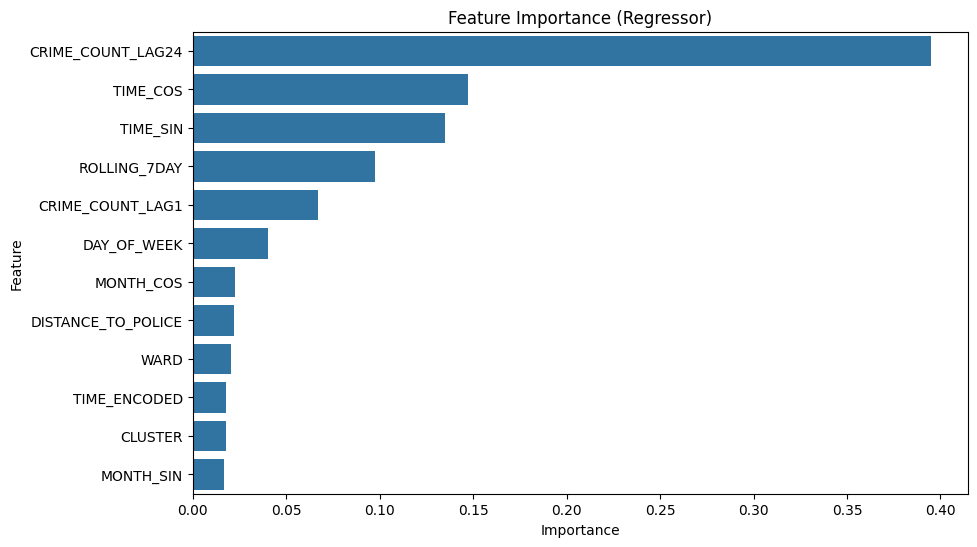

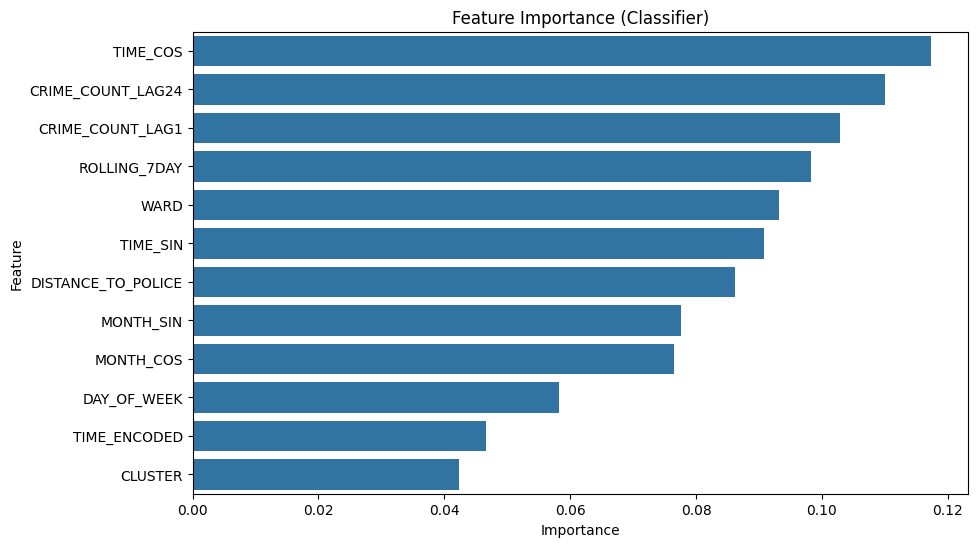

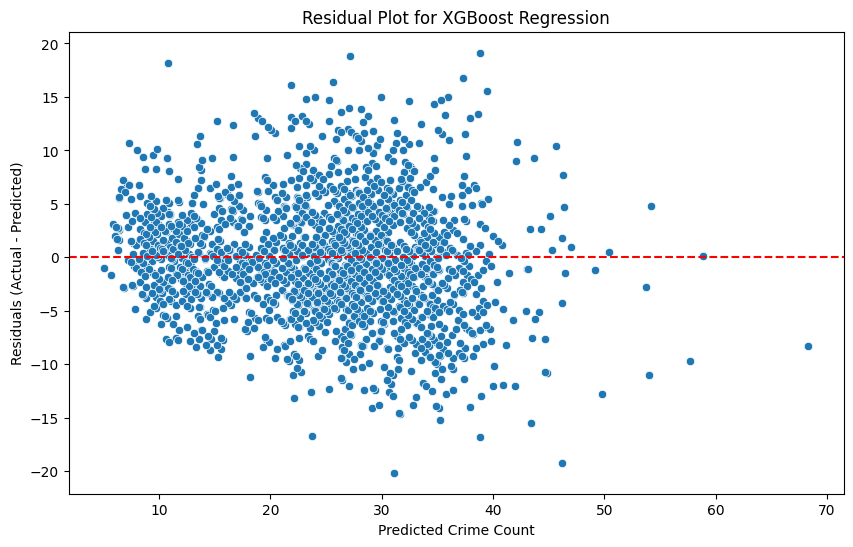

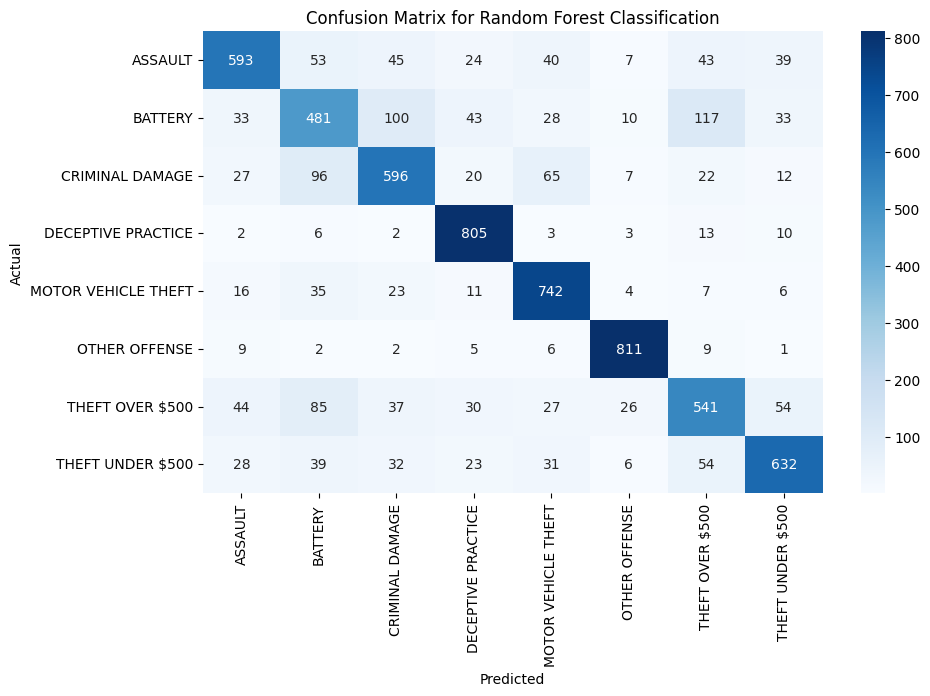

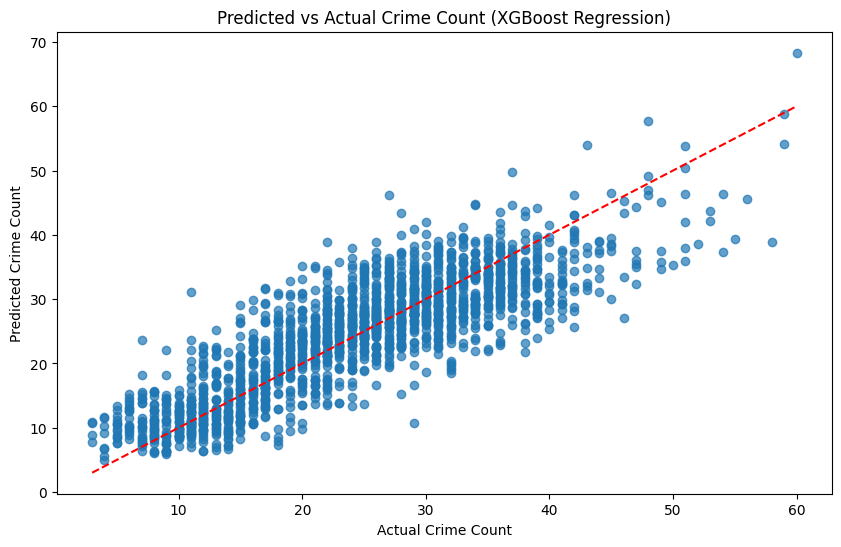

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Haversine formula to calculate distance between two lat/lon points
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return r * c

# Define police districts with coordinates
police_districts = {
    "District 1 (Central)": (41.8345, -87.6216),
    "District 2 (Wentworth)": (41.8027, -87.6185),
    "District 3 (Grand Crossing)": (41.752, -87.6001),
    "District 4 (South Chicago)": (41.7531, -87.5573),
    "District 5 (Calumet)": (41.7365, -87.607),
    "District 6 (Gresham)": (41.7445, -87.6616),
    "District 7 (Englewood)": (41.7843, -87.6745),
    "District 8 (Chicago Lawn)": (41.7794, -87.6864),
    "District 9 (Deering)": (41.827, -87.667),
    "District 10 (Ogden)": (41.8782, -87.7119),
    "District 11 (Harrison)": (41.8589, -87.7107),
    "District 12 (Near West Side)": (41.8844, -87.6456),
    "District 13 (Jefferson Park)": (41.8914, -87.7377),
    "District 14 (Shakespeare)": (41.8986, -87.6743),
    "District 15 (Austin)": (41.8763, -87.7724),
    "District 16 (Albion Park)": (41.9762, -87.7243),
    "District 17 (Woodlawn)": (41.7874, -87.592),
    "District 18 (Pullman)": (41.7317, -87.6079),
    "District 19 (Southwest)": (41.794, -87.74),
    "District 20 (North Lawndale)": (41.8655, -87.7111),
    "District 21 (Near North Side)": (41.9264, -87.6482),
    "District 22 (Lincoln Park)": (41.9252, -87.6549),
}

# Load dataset
file_path = '../raw_data/preprocessed_chicago_old.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Ensure 'DATE OF OCCURRENCE' is in datetime format
data['DATE'] = pd.to_datetime(data['DATE OF OCCURRENCE'])
data['HOUR'] = data['DATE'].dt.floor('h')

# Define time slots based on the hour of the day
def get_time_slot(hour):
    if 0 <= hour < 6:
        return "Late Evening"
    elif 6 <= hour < 9:
        return "Early Morning"
    elif 9 <= hour < 12:
        return "Late Morning"
    elif 12 <= hour < 15:
        return "Early Noon"
    elif 15 <= hour < 18:
        return "Late Noon"
    else:
        return "Early Evening"

# Apply the function to the 'HOUR' feature to create the 'TIME_ENCODED' feature
data['TIME_ENCODED'] = data['HOUR'].dt.hour.apply(get_time_slot)

# Encode 'TIME_ENCODED' feature using LabelEncoder
label_encoder_time = LabelEncoder()
data['TIME_ENCODED'] = label_encoder_time.fit_transform(data['TIME_ENCODED'])

# Aggregate data to hourly counts
hourly_counts = data.groupby('HOUR').size().reset_index(name='CRIME_COUNT')
hourly_dominant_crime = data.groupby('HOUR')['OFFENSES'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

hourly_data = pd.merge(hourly_counts, hourly_dominant_crime, on='HOUR', how='left')

# Create cyclical features
hourly_data['TIME_SIN'] = np.sin(2 * np.pi * hourly_data['HOUR'].dt.hour / 24) # The sine-transformed hour of the day.
hourly_data['TIME_COS'] = np.cos(2 * np.pi * hourly_data['HOUR'].dt.hour / 24) # The cosine-transformed hour of the day.

# Add cyclical features for month
hourly_data['MONTH_SIN'] = np.sin(2 * np.pi * hourly_data['HOUR'].dt.month / 12) # The sine-transformed month. This feature helps capture the cyclical pattern of the months in a year.
hourly_data['MONTH_COS'] = np.cos(2 * np.pi * hourly_data['HOUR'].dt.month / 12) # The cosine-transformed month. It works together with the sine transformation to capture the cyclical nature of months, with complementary information.

hourly_data['ROLLING_7DAY'] = hourly_data['CRIME_COUNT'].rolling(window=7).mean() # This line calculates the 7-day rolling mean of crime counts.
hourly_data['DAY_OF_WEEK'] = hourly_data['HOUR'].dt.dayofweek # This line extracts the day of the week from the HOUR column.
hourly_data['CRIME_COUNT_LAG1'] = hourly_data['CRIME_COUNT'].shift(1) # This feature represents the crime count from the previous period (hour).
hourly_data['CRIME_COUNT_LAG24'] = hourly_data['CRIME_COUNT'].shift(24) # This feature captures the crime count from 24 hours ago (the same time on the previous day).

# Drop NaN values
hourly_data = hourly_data.dropna()

# Add Latitude and Longitude-based features
latitude = data['LATITUDE']
longitude = data['LONGITUDE']

def calculate_nearest_distance(lat, lon):
    distances = [haversine(lat, lon, station[0], station[1]) for station in police_districts.values()]
    return min(distances)

data['DISTANCE_TO_POLICE'] = [calculate_nearest_distance(lat, lon) for lat, lon in zip(latitude, longitude)]

# Spatial Clustering (KMeans) based on latitude and longitude
coords = data[['LATITUDE', 'LONGITUDE']]
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

kmeans = KMeans(n_clusters=5, random_state=42)
data['CLUSTER'] = kmeans.fit_predict(coords_scaled)

# Merge spatial features with hourly data
hourly_data['DISTANCE_TO_POLICE'] = data.groupby('HOUR')['DISTANCE_TO_POLICE'].transform('mean')
hourly_data['CLUSTER'] = data.groupby('HOUR')['CLUSTER'].transform(lambda x: x.mode()[0] if not x.mode().empty else None)

# Add WARD feature (Label Encoding)
label_encoder_ward = LabelEncoder()
data['WARD_ENCODED'] = label_encoder_ward.fit_transform(data['WARD'])

# Merge WARD feature into hourly_data
hourly_data['WARD'] = data.groupby('HOUR')['WARD_ENCODED'].transform(lambda x: x.mode()[0] if not x.mode().empty else None)

hourly_data['TIME_ENCODED'] = data.groupby('HOUR')['TIME_ENCODED'].transform(lambda x: x.mode()[0] if not x.mode().empty else None)

# Feature matrix and target variable for regression and classification
X = hourly_data[['TIME_SIN', 'TIME_COS', 'MONTH_SIN', 'MONTH_COS', 'CRIME_COUNT_LAG1',
                 'CRIME_COUNT_LAG24', 'ROLLING_7DAY', 'DAY_OF_WEEK', 'DISTANCE_TO_POLICE',
                 'CLUSTER', 'WARD', 'TIME_ENCODED']]  # Added 'TIME_ENCODED' as feature

y_reg = hourly_data['CRIME_COUNT']
y_class = hourly_data['OFFENSES']

# Encode categorical offense types into numeric labels (for classification)
label_encoder = LabelEncoder()
y_class_encoded = label_encoder.fit_transform(y_class)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_class_res = smote.fit_resample(X, y_class_encoded)

# Split the data into training, testing, and evaluation sets
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.3, random_state=42, shuffle=True)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_res, y_class_res, test_size=0.3, random_state=42, shuffle=True, stratify=y_class_res)

# Further split the training set into training and evaluation sets
X_train, X_eval, y_train_reg, y_eval_reg = train_test_split(X_train, y_train_reg, test_size=0.3, random_state=42, shuffle=True)
X_train_class, X_eval_class, y_train_class, y_eval_class = train_test_split(X_train_class, y_train_class, test_size=0.3, random_state=42, shuffle=True, stratify=y_train_class)

# Initialize models
regressor = xgb.XGBRegressor(n_estimators=100, random_state=42)
classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Hyperparameter tuning for RandomForestClassifier
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist_rf, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search_rf.fit(X_train_class, y_train_class)
print(f"Best Parameters for RF Classifier: {random_search_rf.best_params_}")

# Train the regression model (XGBoost)
regressor_xgb = xgb.XGBRegressor(n_estimators=100, random_state=42)
regressor_xgb.fit(X_train, y_train_reg)

# Predict on the evaluation set for regression
y_eval_pred_xgb = regressor_xgb.predict(X_eval)

# Evaluate using MSE (Mean Squared Error) for regression
mse_eval_xgb = mean_squared_error(y_eval_reg, y_eval_pred_xgb)
print(f"XGBoost Regression MSE on Evaluation Set: {mse_eval_xgb}")

# Train the classification model (Random Forest)
best_rf_classifier = random_search_rf.best_estimator_
best_rf_classifier.fit(X_train_class, y_train_class)

# Predict on the evaluation set for classification
y_eval_pred_rf = best_rf_classifier.predict(X_eval_class)

# Evaluate using Accuracy for classification
accuracy_eval_rf = accuracy_score(y_eval_class, y_eval_pred_rf)
print(f"Random Forest Classification Accuracy on Evaluation Set: {accuracy_eval_rf}")

# Visualization 1: Feature Importance Plot (Random Forest and XGBoost)
def plot_feature_importance(model, features, model_type="regressor"):
    if model_type == "regressor":
        importance = model.feature_importances_
    else:
        importance = model.feature_importances_

    # Create a DataFrame with feature names and their importance scores
    feature_importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title(f'Feature Importance ({model_type.capitalize()})')
    plt.show()

# Feature importance plot for XGBoost (regression)
plot_feature_importance(regressor_xgb, X.columns, model_type="regressor")

# Feature importance plot for Random Forest (classification)
plot_feature_importance(best_rf_classifier, X.columns, model_type="classifier")

# Visualization 2: Residual Plot for Regression (XGBoost)
# Calculate residuals for XGBoost
y_eval_pred_xgb = regressor_xgb.predict(X_eval)
residuals = y_eval_reg - y_eval_pred_xgb

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_eval_pred_xgb, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot for XGBoost Regression')
plt.xlabel('Predicted Crime Count')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

# Visualization 3: Confusion Matrix for Classification (Random Forest)
y_eval_pred_rf = best_rf_classifier.predict(X_eval_class)

# Generate confusion matrix
cm = confusion_matrix(y_eval_class, y_eval_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Random Forest Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualization 4: Predicted vs Actual Plot for Regression (XGBoost)
plt.figure(figsize=(10, 6))
plt.scatter(y_eval_reg, y_eval_pred_xgb, alpha=0.7)
plt.plot([min(y_eval_reg), max(y_eval_reg)], [min(y_eval_reg), max(y_eval_reg)], color='red', linestyle='--')  # Diagonal line (perfect prediction)
plt.title('Predicted vs Actual Crime Count (XGBoost Regression)')
plt.xlabel('Actual Crime Count')
plt.ylabel('Predicted Crime Count')
plt.show()


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = '../raw_data/preprocessed_chicago_old.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Feature engineering: extract time-related features
data['DATE OF OCCURRENCE'] = pd.to_datetime(data['DATE OF OCCURRENCE'])
data['YEAR'] = data['DATE OF OCCURRENCE'].dt.year
data['MONTH'] = data['DATE OF OCCURRENCE'].dt.month
data['DAY'] = data['DATE OF OCCURRENCE'].dt.day
data['DAY_OF_WEEK'] = data['DATE OF OCCURRENCE'].dt.dayofweek
data['HOUR'] = data['DATE OF OCCURRENCE'].dt.hour

# ---------------------------
# Regression: Predict Number of Crimes
# ---------------------------

# Group data to calculate the number of crimes per time slot, ward, weekend, and month
regression_data = data.groupby(['WARD', 'TIME ENCODED', 'WEEKEND', 'MONTH']).size().reset_index(name='NUM_CRIMES')

# Features and target
X_reg = regression_data.drop(columns=['NUM_CRIMES'])
y_reg = regression_data['NUM_CRIMES']

# Train-test split (70-30)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Train the XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_reg, y_train_reg)

# Predict and evaluate using Mean Absolute Error
y_pred_reg = xgb_model.predict(X_test_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
print(f"Regression MAE: {mae}")

# ---------------------------
# Classification: Predict Type of Crime with Balanced Train Data
# ---------------------------

# Encode target variable (OFFENSES)
label_encoder = LabelEncoder()
data['OFFENSES_ENCODED'] = label_encoder.fit_transform(data['OFFENSES'])

# Features and target
X_class = data[['WARD', 'TIME ENCODED', 'WEEKEND', 'LATITUDE', 'LONGITUDE', 'MONTH_SIN', 'MONTH_COS']]
y_class = data['OFFENSES_ENCODED']

# Train-test split with stratification (70-30)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.3, random_state=42, stratify=y_class
)

# Apply SMOTE to handle class imbalance only on the training data
smote = SMOTE(random_state=42)
X_train_class_balanced, y_train_class_balanced = smote.fit_resample(X_train_class, y_train_class)

# Train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_class_balanced, y_train_class_balanced)

# Predict and evaluate
y_pred_class = rf_model.predict(X_test_class)
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Classification Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class, target_names=label_encoder.classes_))


Regression MAE: 5.305018130824508
Classification Accuracy: 0.2154955691031362
Classification Report:
                     precision    recall  f1-score   support

            ASSAULT       0.15      0.16      0.15      7052
            BATTERY       0.29      0.25      0.27     13730
    CRIMINAL DAMAGE       0.20      0.19      0.19      8592
 DECEPTIVE PRACTICE       0.13      0.16      0.14      4518
MOTOR VEHICLE THEFT       0.16      0.17      0.16      6699
      OTHER OFFENSE       0.12      0.14      0.13      5032
    THEFT OVER $500       0.36      0.36      0.36      9501
   THEFT UNDER $500       0.19      0.18      0.19      8520

           accuracy                           0.22     63644
          macro avg       0.20      0.20      0.20     63644
       weighted avg       0.22      0.22      0.22     63644



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

# Load the dataset
file_path = '../raw_data/preprocessed_chicago_old.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Feature engineering: extract time-related features
data['DATE OF OCCURRENCE'] = pd.to_datetime(data['DATE OF OCCURRENCE'])
data['YEAR'] = data['DATE OF OCCURRENCE'].dt.year
data['MONTH'] = data['DATE OF OCCURRENCE'].dt.month
data['DAY'] = data['DATE OF OCCURRENCE'].dt.day
data['DAY_OF_WEEK'] = data['DATE OF OCCURRENCE'].dt.dayofweek
data['HOUR'] = data['DATE OF OCCURRENCE'].dt.hour

# Binned time feature (time slots: early morning, late morning, etc.)
bins = [0, 6, 12, 18, 24]
labels = [1, 2, 3, 4]  # Corresponding labels for time slots
data['TIME_SLOTS'] = pd.cut(data['HOUR'], bins=bins, labels=labels, right=False)

# Ensure correct data types for mathematical operations
data['LATITUDE'] = pd.to_numeric(data['LATITUDE'], errors='coerce')
data['LONGITUDE'] = pd.to_numeric(data['LONGITUDE'], errors='coerce')
data['TIME_SLOTS'] = pd.to_numeric(data['TIME_SLOTS'], errors='coerce')
data['WEEKEND'] = pd.to_numeric(data['WEEKEND'], errors='coerce')

# Interaction features (Latitude * Longitude, and others)
data['LAT_LONG_INTERACTION'] = data['LATITUDE'] * data['LONGITUDE']
data['TIME_WKEND_INTERACTION'] = data['TIME_SLOTS'] * data['WEEKEND']

# ---------------------------
# Regression: Predict Number of Crimes
# ---------------------------

# Group data to calculate the number of crimes per time slot, ward, weekend, and month
regression_data = data.groupby(['WARD', 'TIME_SLOTS', 'WEEKEND', 'MONTH']).size().reset_index(name='NUM_CRIMES')

# Features and target
X_reg = regression_data.drop(columns=['NUM_CRIMES'])
y_reg = regression_data['NUM_CRIMES']

# Train-test split (70-30)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Train the XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_reg, y_train_reg)

# Predict and evaluate using Mean Absolute Error
y_pred_reg = xgb_model.predict(X_test_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
print(f"Regression MAE: {mae}")

# ---------------------------
# Classification: Predict Type of Crime with Balanced Train Data
# ---------------------------

# Encode target variable (OFFENSES)
label_encoder = LabelEncoder()
data['OFFENSES_ENCODED'] = label_encoder.fit_transform(data['OFFENSES'])

# Features and target
X_class = data[['WARD', 'TIME_SLOTS', 'WEEKEND', 'LATITUDE', 'LONGITUDE', 'MONTH_SIN', 'MONTH_COS', 'LAT_LONG_INTERACTION', 'TIME_WKEND_INTERACTION']]
y_class = data['OFFENSES_ENCODED']

# Train-test split with stratification (70-30)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.3, random_state=42, stratify=y_class
)

# Apply SMOTE to handle class imbalance only on the training data
smote = SMOTE(random_state=42)
X_train_class_balanced, y_train_class_balanced = smote.fit_resample(X_train_class, y_train_class)

# ---------------------------
# Hyperparameter Tuning with GridSearchCV
# ---------------------------

# Set up the parameter grid for RandomForest and XGBoost
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

# Perform GridSearch for RandomForest
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=rf_param_grid, cv=3, n_jobs=-1)
rf_grid_search.fit(X_train_class_balanced, y_train_class_balanced)
print(f"Best Parameters for RandomForest: {rf_grid_search.best_params_}")

# Perform GridSearch for XGBClassifier
xgb_grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=xgb_param_grid, cv=3, n_jobs=-1)
xgb_grid_search.fit(X_train_class_balanced, y_train_class_balanced)
print(f"Best Parameters for XGBClassifier: {xgb_grid_search.best_params_}")

# ---------------------------
# Cross-validation (5-fold)
# ---------------------------

# Evaluate RandomForest with cross-validation
rf_model = RandomForestClassifier(**rf_grid_search.best_params_, random_state=42)
rf_cv_score = cross_val_score(rf_model, X_train_class_balanced, y_train_class_balanced, cv=5, scoring='accuracy')
print(f"RandomForest 5-fold Cross-validation Accuracy: {np.mean(rf_cv_score)}")

# Evaluate XGBoost with cross-validation
xgb_model = XGBClassifier(**xgb_grid_search.best_params_, random_state=42)
xgb_cv_score = cross_val_score(xgb_model, X_train_class_balanced, y_train_class_balanced, cv=5, scoring='accuracy')
print(f"XGBoost 5-fold Cross-validation Accuracy: {np.mean(xgb_cv_score)}")

# ---------------------------
# Train the models and evaluate
# ---------------------------

# Final model (RandomForest or XGBoost based on cross-validation performance)
best_model = rf_model if np.mean(rf_cv_score) > np.mean(xgb_cv_score) else xgb_model
best_model.fit(X_train_class_balanced, y_train_class_balanced)

# Predict and evaluate
y_pred_class = best_model.predict(X_test_class)
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Classification Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class, target_names=label_encoder.classes_))


Regression MAE: 6.837409432066812


/home/suman/.pyenv/versions/risky_predictive_policing/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = '../raw_data/preprocessed_chicago_old.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Check columns to find correct column names for 'OFFENSES' and other relevant data
print(data.columns)  # Check if 'OFFENSES' is present and determine the correct column

# Feature engineering: extract time-related features
data['DATE OF OCCURRENCE'] = pd.to_datetime(data['DATE OF OCCURRENCE'], errors='coerce')
data['YEAR'] = data['DATE OF OCCURRENCE'].dt.year
data['MONTH'] = data['DATE OF OCCURRENCE'].dt.month
data['DAY'] = data['DATE OF OCCURRENCE'].dt.day
data['DAY_OF_WEEK'] = data['DATE OF OCCURRENCE'].dt.dayofweek
data['HOUR'] = data['DATE OF OCCURRENCE'].dt.hour
data['WEEKEND'] = data['DAY_OF_WEEK'].isin([5, 6])  # Saturday and Sunday are weekends

# Encode target variable (make sure 'OFFENSES' is correct after merge)
label_encoder = LabelEncoder()
data['OFFENSES_ENCODED'] = label_encoder.fit_transform(data['OFFENSES'])  # Use correct column for crime types

# ---------------------------
# Adding New Features
# ---------------------------

# 1. Aggregate data to hourly counts
hourly_counts = data.groupby('HOUR').size().reset_index(name='CRIME_COUNT')

# 2. Hourly dominant crime (mode)
hourly_dominant_crime = data.groupby('HOUR')['OFFENSES'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Merge the two features into one dataframe
hourly_data = pd.merge(hourly_counts, hourly_dominant_crime, on='HOUR', how='left', suffixes=('_COUNT', '_DOMINANT_CRIME'))

# 3. Create cyclical features for HOUR (Time of day)
hourly_data['TIME_SIN'] = np.sin(2 * np.pi * hourly_data['HOUR'] / 24)
hourly_data['TIME_COS'] = np.cos(2 * np.pi * hourly_data['HOUR'] / 24)

# 4. Add cyclical features for MONTH
data['MONTH_SIN'] = np.sin(2 * np.pi * data['MONTH'] / 12)
data['MONTH_COS'] = np.cos(2 * np.pi * data['MONTH'] / 12)

# 5. Add a 7-day rolling mean of crime counts (if you want this aggregated per hour, it should be calculated on the hourly data)
hourly_data['ROLLING_7DAY'] = hourly_data['CRIME_COUNT'].rolling(window=7).mean()

# 6. Add lag features (previous hour and previous day)
hourly_data['CRIME_COUNT_LAG1'] = hourly_data['CRIME_COUNT'].shift(1)  # Crime count in previous hour
#hourly_data['CRIME_COUNT_LAG24'] = hourly_data['CRIME_COUNT'].shift(24)  # Crime count in previous day (24 hours)

# Handling missing values from lagging and rolling operations (if any)
hourly_data = hourly_data.bfill()

# Show the first few rows of the hourly_data with new features
print(hourly_data.head())

# ---------------------------
# Merge these new features back to your main dataset (if needed for model training)
# ---------------------------

# Merge with the main data (if necessary, depending on model features required)
data = pd.merge(data, hourly_data, on='HOUR', how='left')

# ---------------------------
# 1. Regression: Predict Number of Crimes
# ---------------------------

# Group data to calculate the number of crimes per time slot, ward, weekend, and month
regression_data = data.groupby(['WARD', 'TIME ENCODED', 'WEEKEND', 'MONTH']).size().reset_index(name='NUM_CRIMES')

# Features and target for regression
X_reg = regression_data.drop(columns=['NUM_CRIMES'])
y_reg = regression_data['NUM_CRIMES']

# Train-test split (70-30)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Train the XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_reg, y_train_reg)

# Predict and evaluate using Mean Absolute Error
y_pred_reg = xgb_model.predict(X_test_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
print(f"Regression MAE: {mae}")

# ---------------------------
# 2. Classification: Predict Type of Crime with Balanced Train Data
# ---------------------------

# Features and target for classification
X_class = data[['WARD', 'TIME ENCODED', 'WEEKEND', 'LATITUDE', 'LONGITUDE', 'MONTH_SIN', 'MONTH_COS', 'TIME_SIN', 'TIME_COS', 'ROLLING_7DAY', 'CRIME_COUNT_LAG1']]
y_class = data['OFFENSES_ENCODED']

# Train-test split with stratification (70-30)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.3, random_state=42, stratify=y_class
)

# Apply SMOTE to handle class imbalance only on the training data
smote = SMOTE(random_state=42)
X_train_class_balanced, y_train_class_balanced = smote.fit_resample(X_train_class, y_train_class)

# Train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_class_balanced, y_train_class_balanced)

# Predict and evaluate
y_pred_class = rf_model.predict(X_test_class)
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Classification Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class, target_names=label_encoder.classes_))


Index(['WARD', 'TIME ENCODED', 'MONTH_SIN', 'MONTH_COS', 'WEEKEND',
       'DATE OF OCCURRENCE', 'OFFENSES', 'LATITUDE', 'LONGITUDE'],
      dtype='object')
   HOUR  CRIME_COUNT OFFENSES  TIME_SIN  TIME_COS  ROLLING_7DAY  \
0     0        13792  BATTERY  0.000000  1.000000   6205.714286   
1     1         6915  BATTERY  0.258819  0.965926   6205.714286   
2     2         6070  BATTERY  0.500000  0.866025   6205.714286   
3     3         5032  BATTERY  0.707107  0.707107   6205.714286   
4     4         4092  BATTERY  0.866025  0.500000   6205.714286   

   CRIME_COUNT_LAG1  
0           13792.0  
1           13792.0  
2            6915.0  
3            6070.0  
4            5032.0  
Regression MAE: 5.337922798126135
Classification Accuracy: 0.21078184903525862
Classification Report:
                     precision    recall  f1-score   support

            ASSAULT       0.15      0.15      0.15      7052
            BATTERY       0.27      0.26      0.27     13730
    CRIMINAL DAMAGE   